#Libraries

In [1]:
#Data Handling
import pandas as pd
import numpy as np
import math
from datetime import datetime

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Sklearn
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    KFold,
    StratifiedKFold
)
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    LabelEncoder,
    TargetEncoder
)
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    classification_report
)
from sklearn.feature_selection import (
    mutual_info_regression,
    SelectKBest,
    SelectFromModel
)
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

#TensorFlow/Keras
try:
  import tensorflow as tf
except:
  !pip install tensorflow
  import tensorflow as tf
from tensorflow import keras
print('Tensorflow/Keras: %s' % keras.__version__)

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam, Nadam, AdamW
from keras.losses import Huber
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
from tensorflow.keras.regularizers import l1_l2
from keras import Input

Tensorflow/Keras: 3.8.0


#Real World SmartPhone's Cleanup

##Set up

In [2]:
use_mean = True
use_median = False

In [3]:
# use_mean = False
# use_median = False
# choice = ''
# while choice not in ['1', '2', '3']:
#   print('1. Use mean')
#   print('2. Use median')
#   print('3. Use mode')
#   choice = input('Enter your choice:')

# if choice == '1':
#   use_mean = True
# elif choice == '2':
#   use_median = True

##Importing Dataset

In [4]:
data = pd.read_csv('smartphones.csv')
data.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [5]:
data.shape

(980, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

In [7]:
data.describe()

,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,980.000000,879.000000,980.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,975.000000,980.000000,980.000000,980.000000
mean,32520.504082,7.825825,0.560204,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,50.319286,16.589744,0.630612,2214.663265,1075.852041
std,39531.812669,0.740285,0.496616,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,33.000968,10.876944,0.482885,516.484254,290.164931
min,3499.000000,6.000000,0.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,2.000000,0.000000,0.000000,480.000000,480.000000
25%,12999.000000,7.400000,0.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,24.000000,8.000000,0.000000,1612.000000,1080.000000
50%,19994.500000,8.000000,1.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,50.000000,16.000000,1.000000,2400.000000,1080.000000
75%,35491.500000,8.400000,1.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,64.000000,16.000000,1.000000,2408.000000,1080.000000
max,650000.000000,8.900000,1.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,200.000000,60.000000,1.000000,3840.000000,2460.000000


In [8]:
for col in data.columns:
  print(data[col].value_counts())
  print()

brand_name
xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
nokia         13
honor         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
jio            4
lava           4
redmi          3
lg             3
oukitel        3
letv           3
micromax       3
ikall          3
gionee         3
zte            2
royole         2
lyf            2
lenovo         2
doogee         2
blackview      1
cat            1
cola           1
duoqin         1
blu            1
leitz          1
leeco          1
sharp          1
tcl            1
tesla          1
vertu          1
Name: count, dtype: int64

model
ZTE Axon 40 Ultra 5G            1
Apple iPhone 11                 1
Apple iPhone 11 (128GB)         1
Apple iPhone 11 Pro Max         1
Apple iPhone 12                 1
    

Looking for null values

In [9]:
data.isnull().sum()

,0
brand_name,0
model,0
price,0
avg_rating,101
5G_or_not,0
processor_brand,20
num_cores,6
processor_speed,42
battery_capacity,11
fast_charging_available,0


Looking for duplicates

In [10]:
data.duplicated().sum()

np.int64(0)

##Cleaning


In [11]:
cleaned = data.copy()

###Filling in missing string values with "Not Defined" and numerical values with either mean, mode or median

In [12]:
cleaned.isnull().sum()

,0
brand_name,0
model,0
price,0
avg_rating,101
5G_or_not,0
processor_brand,20
num_cores,6
processor_speed,42
battery_capacity,11
fast_charging_available,0


In [13]:
for col in cleaned.columns:
  if cleaned.dtypes[col] == 'object':
    cleaned[col] = cleaned[col].fillna(value = "Not Defined")
  elif use_mean:
    cleaned[col] = cleaned[col].fillna(cleaned[col].mean())
  elif use_median:
    cleaned[col] = cleaned[col].fillna(cleaned[col].median())
  else:
    cleaned[col] = cleaned[col].fillna(cleaned[col].mode()[0])

Rechecking nulls

In [14]:
cleaned.isnull().sum()

,0
brand_name,0
model,0
price,0
avg_rating,0
5G_or_not,0
processor_brand,0
num_cores,0
processor_speed,0
battery_capacity,0
fast_charging_available,0


Rechecking duplicates

In [15]:
cleaned.duplicated().sum()

np.int64(0)

Converting price from Rupees to USD via the 2023 conversion rate, which was when this dataset was generated

In [16]:
cleaned['price'] = cleaned['price'] / 82.57 #https://fred.stlouisfed.org/series/AEXINUS

In [17]:
cleaned.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,472.314400,7.3,0,bionic,6.0,2.65,3110.000000,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),569.201889,7.5,0,bionic,6.0,2.65,3110.000000,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,1330.991886,7.7,0,bionic,6.0,2.65,3500.000000,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,629.756570,7.4,1,bionic,6.0,3.10,4817.748194,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),678.200315,7.5,1,bionic,6.0,3.10,4817.748194,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


###Anomally handling

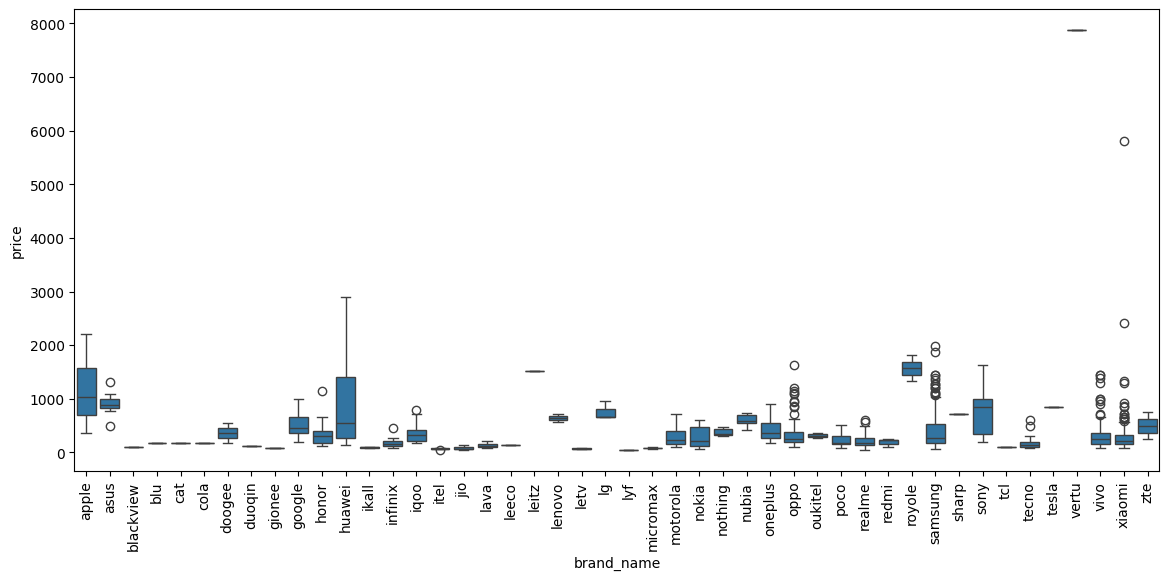

In [18]:
plt.figure(figsize=(14,6))
sns.boxplot(x=cleaned['brand_name'], y=cleaned['price'])
plt.xticks(rotation='vertical')
plt.show()

In [19]:
# cleaned.drop(cleaned[cleaned['price'] > 200000].index, inplace=True)

In [20]:
Q1 = cleaned['price'].quantile(0.25)
Q3 = cleaned['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

cleaned.drop(cleaned[cleaned['price'] > (Q3 + 1.5 * IQR)].index, inplace=True)
cleaned.drop(cleaned[cleaned['price'] < (Q1 - 1.5 * IQR)].index, inplace=True)

Q1: 157.43005934358726
Q3: 429.83529126801506
IQR: 272.40523192442777
Lower bound: -251.1777885430544
Upper bound: 838.4431391546567


##Preparing data for modelling

###Dropping columns

In [21]:
cleaned.drop('model', inplace=True, axis=1) #because it is unique
cleaned.drop('fast_charging', axis=1, inplace = True) #Many missing values, so dropped

In [22]:
cleaned_Real_Phones = cleaned.copy()

#Mobiles Dataset (2025) Cleanup

##Importing Dataset

In [23]:
data = pd.read_csv("Mobiles Dataset (2025).csv", encoding = "latin-1")

data.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [24]:
data.columns

Index(['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size',
       'Launched Price (Pakistan)', 'Launched Price (India)',
       'Launched Price (China)', 'Launched Price (USA)',
       'Launched Price (Dubai)', 'Launched Year'],
      dtype='object')

In [25]:
data.shape

(930, 15)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

In [27]:
data.describe()

,Launched Year
count,930.000000
mean,2022.193548
std,1.862080
min,2014.000000
25%,2021.000000
50%,2023.000000
75%,2024.000000
max,2025.000000


In [28]:
for col in data.columns:
  print(data[col].value_counts())
  print()

Company Name
Oppo        129
Apple        97
Honor        91
Samsung      88
Vivo         86
Realme       69
Motorola     62
Infinix      56
OnePlus      53
Huawei       42
Tecno        39
POCO         30
Xiaomi       27
Google       21
Lenovo       15
Nokia        11
Sony          9
iQOO          3
Poco          2
Name: count, dtype: int64

Model Name
Pad 128GB        3
Pad 2 256GB      3
K10x 128GB       2
K10x 256GB       2
K10 5G 128GB     2
                ..
V25 Pro 128GB    1
V25 Pro 256GB    1
X90 Pro 256GB    1
X90 Pro 512GB    1
X70 Pro 128GB    1
Name: count, Length: 908, dtype: int64

Mobile Weight
190g      68
195g      64
185g      29
192g      26
180g      25
          ..
288g       1
495g       1
505g       1
475g       1
178.8g     1
Name: count, Length: 148, dtype: int64

RAM
8GB           308
6GB           206
12GB          193
4GB           146
3GB            34
16GB           31
2GB             6
1.5GB           2
8GB / 12GB      2
10GB            1
1GB            

Looking for null values

In [29]:
data.isnull().sum()

,0
Company Name,0
Model Name,0
Mobile Weight,0
RAM,0
Front Camera,0
Back Camera,0
Processor,0
Battery Capacity,0
Screen Size,0
Launched Price (Pakistan),0


Hence no nulls

Looking for duplicates

In [30]:
data.duplicated().sum()

np.int64(15)

Inspecting unique values

In [31]:
temp = ['Mobile Weight', 'RAM', 'Front Camera', 'Back Camera', 'Battery Capacity', 'Screen Size']

for col in temp:
    print(f"Unique values for column ", col, ":")
    print(data[col].unique())
    print()


Unique values for column  Mobile Weight :
['174g' '203g' '206g' '221g' '171g' '172g' '140g' '204g' '238g' '135g'
 '164g' '189g' '228g' '194g' '188g' '226g' '177g' '208g' '458g' '490g'
 '300.5g' '468g' '682g' '708g' '234g' '196g' '168g' '195g' '167g' '254g'
 '187g' '263g' '199g' '190g' '202g' '198g' '192g' '235g' '191g' '181g'
 '178g' '175g' '165g' '143g' '229g' '732g' '586g' '498g' '523g' '726g'
 '567g' '503g' '480g' '366g' '508g' '433g' '674g' '426g' '360g' '205g'
 '179g' '200g' '183g' '185g' '180g' '173g' '184g' '170g' '162g' '210g'
 '155g' '215g' '550g' '610g' '223g' '150g' '146g' '158g' '163g' '153g'
 '176g' '201g' '193g' '159g' '156g' '182g' '535g' '510g' '500g' '560g'
 '520g' '540g' '555g' '239g' '186g' '533g' '218g' '207g' '233g' '222.8g'
 '440g' '482g' '466g' '499g' '372g' '465g' '209g' '166g' '169g' '295g'
 '255g' '197g' '225g' '220g' '241g' '245g' '161g' '580g' '147g' '151g'
 '212g' '213g' '216g' '222g' '250g' '450g' '420g' '280g' '230g' '240g'
 '470g' '211g' '227g' '236g' '2

##Cleaning


In [32]:
cleaned = data.copy()

###Handling duplicates

In [33]:
cleaned.duplicated().sum()

np.int64(15)

In [34]:
cleaned.drop_duplicates(inplace=True)

In [35]:
cleaned.duplicated().sum()

np.int64(0)

###Converting battery to int

In [36]:
cleaned['Battery Capacity'] = cleaned['Battery Capacity'].str.replace('mAh', '').str.replace(',', '').astype(int)

###Converting RAM to float

Replace '8GB / 12GB' with '8GB', since this is the base configuration

In [37]:
cleaned['RAM'] = cleaned['RAM'].replace('8GB / 12GB', '8GB')

In [38]:
cleaned['RAM'] = cleaned['RAM'].str.replace('GB', '').astype(float)  # Remove 'GB' and convert to float

###Converting Weight

In [39]:
cleaned['Mobile Weight'] = cleaned['Mobile Weight'].str.replace('g', '').astype(float)

###Convert size

Setting the size to the maximum size for the foldable devices

In [40]:
cleaned['Screen Size'] = cleaned['Screen Size'].replace('6.7 inches (main), 2.7 inches (external)', '6.7 inches')
cleaned['Screen Size'] = cleaned['Screen Size'].replace('6.9 inches (internal), 4.0 inches (external)', '6.9 inches')
cleaned['Screen Size'] = cleaned['Screen Size'].replace( '6.7 inches (internal), 3.6 inches (external)', '6.7 inches')

Looking at unique screen size values

In [41]:
col = 'Screen Size'
print(f"Unique values for column ", col, ":")
print(cleaned[col].unique())

Unique values for column  Screen Size :
['6.1 inches' '6.7 inches' '5.4 inches' '5.8 inches' '6.5 inches'
 '10.9 inches' '10.2 inches' '7.9 inches' '11 inches' '12.9 inches'
 '13 inches' '6.8 inches' '6.6 inches' '7.6 inches' '6.4 inches'
 '6.9 inches' '6.3 inches' '5.3 inches' '6.0 inches' '5.5 inches'
 '5.7 inches' '5.2 inches' '14.6 inches' '12.4 inches' '8.7 inches'
 '10.5 inches' '8 inches' '10.1 inches' '6.74 inches' '6.72 inches'
 '7.8 inches' '6.55 inches' '6.43 inches' '6.49 inches' '6.52 inches'
 '6.78 inches' '6.59 inches' '6.44 inches' '6.41 inches' '6.01 inches'
 '6.67 inches' '6.28 inches' '11.61 inches' '6.31 inches' '6.58 inches'
 '6.38 inches' '6.56 inches' '5.88 inches' '6.22 inches' '5.0 inches'
 '6.51 inches' '6.35 inches' '6.53 inches' '6.39 inches' '6.47 inches'
 '10.4 inches' '12.3 inches' '7.82 inches' '6.83 inches' '11.6 inches'
 '12.1 inches' '6.82 inches' '7.1 inches' '11.5 inches' '6.73 inches'
 '6.36 inches' '6.09 inches' '6.9 inches (unfolded)'
 '8.0 inche

Checking on rows with '(unfolded)' to determine if they would be an issue

In [42]:
cleaned[cleaned['Screen Size'].str.contains('unfolded', case=False, na=False)]

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
628,Huawei,P50 Pocket,190.0,8.0,10.7MP,40MP,Snapdragon 888 4G,4000,6.9 inches (unfolded),"PKR 199,999","INR 129,999","CNY 8,988","USD 1,299","AED 4,799",2021
630,Huawei,Mate X2,295.0,8.0,16MP,50MP,Kirin 9000 5G,4500,8.0 inches (unfolded),"PKR 349,999","INR 249,999","CNY 17,999","USD 2,699","AED 9,999",2021
634,Huawei,Mate Xs 2,255.0,8.0,10.7MP,50MP,Snapdragon 888 4G,4600,7.8 inches (unfolded),"PKR 299,999","INR 199,999","CNY 14,999","USD 2,499","AED 8,999",2022
643,Huawei,Mate X3,239.0,12.0,8MP,50MP (wide) + 13MP (ultrawide) + 12MP (perisco...,Snapdragon 8+ Gen 1 4G,4800,7.85 inches (unfolded),"PKR 349,999","INR 249,999","CNY 13,999","USD 2,499","AED 9,999",2023


Converting size to float

In [43]:
cleaned['Screen Size'] = cleaned['Screen Size'].str.extract(r'(\d+\.?\d*)').astype(float)

Checking that unfolded is properly done

In [44]:
cleaned[cleaned.index==628]

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
628,Huawei,P50 Pocket,190.0,8.0,10.7MP,40MP,Snapdragon 888 4G,4000,6.9,"PKR 199,999","INR 129,999","CNY 8,988","USD 1,299","AED 4,799",2021


###Converting Back Camera

Normalizing specific values

In [45]:
cleaned['Back Camera'] = cleaned['Back Camera'].replace('13MP (f/1.8, AF)', '13 MP')

Checking if any value is separated by a comma

In [46]:
cleaned[cleaned['Back Camera'].str.contains(',', na=False)]

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year


Splitting up back camera into differnt columns depending on the number of cameras, indicated by +

In [47]:
split_columns = cleaned['Back Camera'].str.split('+', expand=True)
split_columns.columns = [f'Back Camera {i+1}' for i in range(split_columns.shape[1])]
# Merging into cleaned
cleaned = pd.concat([cleaned, split_columns], axis=1)

In [48]:
cleaned.drop(columns=['Back Camera'], inplace=True)

Converting Back Cameras into int and replacing nulls with 0

In [49]:
columns_to_convert = ['Back Camera 1', 'Back Camera 2', 'Back Camera 3', 'Back Camera 4']
for col in columns_to_convert:
    cleaned[col] = cleaned[col].str.extract('(\d+)').astype(float).fillna(0).astype(int)

###Converting Front Camera

Fixing specific values

In [50]:
cleaned['Front Camera'] = cleaned['Front Camera'].replace('10MP, 4MP (UDC)', '10 MP + 4 MP')
cleaned['Front Camera'] = cleaned['Front Camera'].replace('12MP / 4K', '12 MP')

Checking for commas

In [51]:
cleaned[cleaned['Front Camera'].str.contains(',', na=False)]

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,Back Camera 1,Back Camera 2,Back Camera 3,Back Camera 4


Splitting up back camera into differnt columns depending on the number of cameras, indicated by +

In [52]:
split_columns = cleaned['Front Camera'].str.split('+', expand=True)
split_columns.columns = [f'Front Camera {i+1}' for i in range(split_columns.shape[1])]
# Merging into cleaned
cleaned = pd.concat([cleaned, split_columns], axis=1)

In [53]:
cleaned.drop(columns=['Front Camera'], inplace=True)

Converting to int and filling nulls with 0

In [54]:
cleaned['Front Camera 1'] = cleaned['Front Camera 1'].str.extract('(\d+)').astype(float).fillna(0).astype(int)
cleaned['Front Camera 2'] = cleaned['Front Camera 2'].str.extract('(\d+)').astype(float).fillna(0).astype(int)

###Extracting Storage from Model Name

Checking the units used

Removing records of models that do not contain TB or GB

In [55]:
temp = cleaned[~cleaned['Model Name'].str.contains('TB|GB', na=False)]
temp['Model Name'].unique()

array(['OnePlus Pad', 'OnePlus Pad 2', 'OnePlus Pad Pro', 'P50',
       'P50 Pro', 'P50 Pocket', 'Mate 40E', 'Mate X2', 'Nova 9',
       'Nova 9 Pro', 'P50E', 'Mate Xs 2', 'Mate 50', 'Mate 50 Pro',
       'Nova 10', 'Nova 10 Pro', 'Nova 10 SE', 'P60', 'P60 Pro',
       'P60 Art', 'Mate X3', 'Mate 60', 'Mate 60 Pro', 'Mate 60 Pro+',
       'Nova 11', 'Nova 11 Pro', 'Nova 11 Ultra', 'Pura 70',
       'Pura 70 Pro', 'Pura 70 Pro+', 'Pura 70 Ultra', 'Mate 70',
       'Mate 70 Pro', 'Mate 70 Pro+', 'Mate X6', 'Nova 12', 'Nova 12 Pro',
       'T21', 'Xpad', 'Xpad 5G', 'Xpad Lite', 'Xpad Pro', 'Hot 50',
       'Hot 50i', 'Hot 50 5G', 'Hot 50 Pro', 'Hot 50 Pro+', 'GT 20 Pro',
       'Note 40X 5G', 'Note 40S', 'Note 40 5G', 'Note 40 Pro 5G',
       'Note 40 Racing Edition', 'Hot 40', 'Hot 40i', 'Hot 40 Pro',
       'Zero 40', 'Zero 40 5G', 'Zero Flip', 'Note 40', 'Note 40 Pro',
       '9X Lite', '30', '30 Pro', '30 Pro+', '30S', 'X10', 'X10 Max',
       'Play 4', 'Play 4 Pro', '10X Lite', 'V40'

In [56]:
cleaned = cleaned[cleaned['Model Name'].str.contains('GB|TB', na=False)]

In [57]:
cleaned[['Model Name', 'Storage']] = cleaned['Model Name'].str.extract(r'(.+)\s(\d+(?:GB|TB))')

Checking for nulls and duplicates

In [58]:
cleaned.isnull().sum()

,0
Company Name,0
Model Name,0
Mobile Weight,0
RAM,0
Processor,0
Battery Capacity,0
Screen Size,0
Launched Price (Pakistan),0
Launched Price (India),0
Launched Price (China),0


In [59]:
cleaned.duplicated().sum()

np.int64(0)

Converting storage to int in terms of GB

In [60]:
cleaned['Storage'] = cleaned['Storage'].str.replace('TB', '*1024').str.replace('GB', '').map(eval).astype(str) + 'GB'

In [61]:
cleaned['Storage'] = cleaned['Storage'].str.extract('(\d+)').astype(int)

###Converting Prices in floats

In [62]:
price_columns = [
    "Launched Price (Pakistan)",
    "Launched Price (India)",
    "Launched Price (China)",
    "Launched Price (USA)",
    "Launched Price (Dubai)"
]

Removing everything except digits and '.' from price columns

In [63]:
for col in price_columns:
    cleaned[col] = cleaned[col].str.replace(r"[^\d.]", "", regex=True)

Converting prices to floats

In [64]:
for col in price_columns:
    cleaned[col] = pd.to_numeric(cleaned[col], errors='coerce')

In [65]:
cleaned.isnull().sum()

,0
Company Name,0
Model Name,0
Mobile Weight,0
RAM,0
Processor,0
Battery Capacity,0
Screen Size,0
Launched Price (Pakistan),1
Launched Price (India),0
Launched Price (China),0


Inspecting null value

In [66]:
cleaned[cleaned.isnull().any(axis=1)]

,Company Name,Model Name,Mobile Weight,RAM,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,Back Camera 1,Back Camera 2,Back Camera 3,Back Camera 4,Front Camera 1,Front Camera 2,Storage
929,Samsung,Galaxy Z Fold6,239.0,12.0,Snapdragon 8 Gen 3,4400,7.6,NaN,200999,17999,2259.0,8699,2024,50,0,0,0,10,4,1024


In [67]:
data[data.index==929]

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
929,Samsung,Galaxy Z Fold6 1TB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,Not available,"INR 200,999","CNY 17,999","USD 2,259","AED 8,699",2024


Since the value here is not available from the original dataset, we convert to Pakistan using the average conversion rate in 2024 from USD

In [68]:
cleaned['Launched Price (Pakistan)'] = cleaned['Launched Price (Pakistan)'].fillna(630508.08)

In [69]:
cleaned[cleaned.index==929]

,Company Name,Model Name,Mobile Weight,RAM,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,Back Camera 1,Back Camera 2,Back Camera 3,Back Camera 4,Front Camera 1,Front Camera 2,Storage
929,Samsung,Galaxy Z Fold6,239.0,12.0,Snapdragon 8 Gen 3,4400,7.6,630508.08,200999,17999,2259.0,8699,2024,50,0,0,0,10,4,1024


###Inspecting Cleaned dataframe

In [70]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 0 to 929
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               763 non-null    object 
 1   Model Name                 763 non-null    object 
 2   Mobile Weight              763 non-null    float64
 3   RAM                        763 non-null    float64
 4   Processor                  763 non-null    object 
 5   Battery Capacity           763 non-null    int64  
 6   Screen Size                763 non-null    float64
 7   Launched Price (Pakistan)  763 non-null    float64
 8   Launched Price (India)     763 non-null    int64  
 9   Launched Price (China)     763 non-null    int64  
 10  Launched Price (USA)       763 non-null    float64
 11  Launched Price (Dubai)     763 non-null    int64  
 12  Launched Year              763 non-null    int64  
 13  Back Camera 1              763 non-null    int64  
 14 

In [71]:
for col in cleaned.columns:
  if cleaned.dtypes[col] == 'object':
    print(col)

Company Name
Model Name
Processor


In [72]:
cleaned.describe()

,Mobile Weight,RAM,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,Back Camera 1,Back Camera 2,Back Camera 3,Back Camera 4,Front Camera 1,Front Camera 2,Storage
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,221.309830,7.651376,4955.618611,6.956225,127703.508624,50001.473132,3829.707733,572.429436,2141.993447,2022.132372,45.283093,6.643512,2.694626,0.047182,18.077326,0.089122,213.619921
std,99.156102,3.222046,1311.545769,1.412366,106236.084151,39558.061192,2719.527314,400.432143,1488.515425,1.952732,29.807802,12.074302,10.082068,0.303742,11.338761,0.876898,156.355196
min,135.000000,1.000000,2000.000000,5.000000,15999.000000,5999.000000,499.000000,79.000000,299.000000,2014.000000,5.000000,0.000000,0.000000,0.000000,2.000000,0.000000,16.000000
25%,184.000000,6.000000,4400.000000,6.500000,51499.500000,19999.000000,1699.500000,249.000000,999.000000,2021.000000,13.000000,0.000000,0.000000,0.000000,8.000000,0.000000,128.000000
50%,193.000000,8.000000,5000.000000,6.600000,84999.000000,34999.000000,2900.000000,449.000000,1620.000000,2023.000000,50.000000,2.000000,0.000000,0.000000,16.000000,0.000000,128.000000
75%,206.000000,8.000000,5000.000000,6.740000,179999.000000,74949.500000,5649.000000,849.000000,3199.000000,2024.000000,50.000000,8.000000,0.000000,0.000000,32.000000,0.000000,256.000000
max,732.000000,16.000000,11200.000000,14.600000,630508.080000,274999.000000,17999.000000,2799.000000,11099.000000,2025.000000,200.000000,64.000000,64.000000,2.000000,60.000000,12.000000,2048.000000


In [73]:
cleaned.head()

,Company Name,Model Name,Mobile Weight,RAM,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,Back Camera 1,Back Camera 2,Back Camera 3,Back Camera 4,Front Camera 1,Front Camera 2,Storage
0,Apple,iPhone 16,174.0,6.0,A17 Bionic,3600,6.1,224999.0,79999,5799,799.0,2799,2024,48,0,0,0,12,0,128
1,Apple,iPhone 16,174.0,6.0,A17 Bionic,3600,6.1,234999.0,84999,6099,849.0,2999,2024,48,0,0,0,12,0,256
2,Apple,iPhone 16,174.0,6.0,A17 Bionic,3600,6.1,244999.0,89999,6499,899.0,3199,2024,48,0,0,0,12,0,512
3,Apple,iPhone 16 Plus,203.0,6.0,A17 Bionic,4200,6.7,249999.0,89999,6199,899.0,3199,2024,48,0,0,0,12,0,128
4,Apple,iPhone 16 Plus,203.0,6.0,A17 Bionic,4200,6.7,259999.0,94999,6499,949.0,3399,2024,48,0,0,0,12,0,256


In [74]:
cleaned.isnull().sum()

,0
Company Name,0
Model Name,0
Mobile Weight,0
RAM,0
Processor,0
Battery Capacity,0
Screen Size,0
Launched Price (Pakistan),0
Launched Price (India),0
Launched Price (China),0


In [75]:
cleaned.duplicated().sum()

np.int64(0)

###Anomally handling

Helper function to polt the box plots

In [76]:
cleaned['price'] = cleaned['Launched Price (USA)']

In [77]:
Q3 = cleaned['price'].quantile(0.75)
Q1 = cleaned['price'].quantile(0.25)
IQR = Q3 - Q1
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

Q1: 249.0
Q3: 849.0
IQR: 600.0


In [78]:
print(Q3 + 1.5 * IQR)
cleaned[cleaned['price'] > (Q3 + 1.5 * IQR)].shape #Number of outliers above

1749.0


(12, 21)

In [79]:
print(Q1 - 1.5 * IQR)
cleaned[cleaned['price'] < (Q1 - 1.5 * IQR)].shape #Number of outliers below

-651.0


(0, 21)

In [80]:
def box_plot(df, x, y):
  plt.figure(figsize=(14,6))
  sns.boxplot(x=df[x], y=df[y])
  plt.xticks(rotation='vertical')
  plt.show()

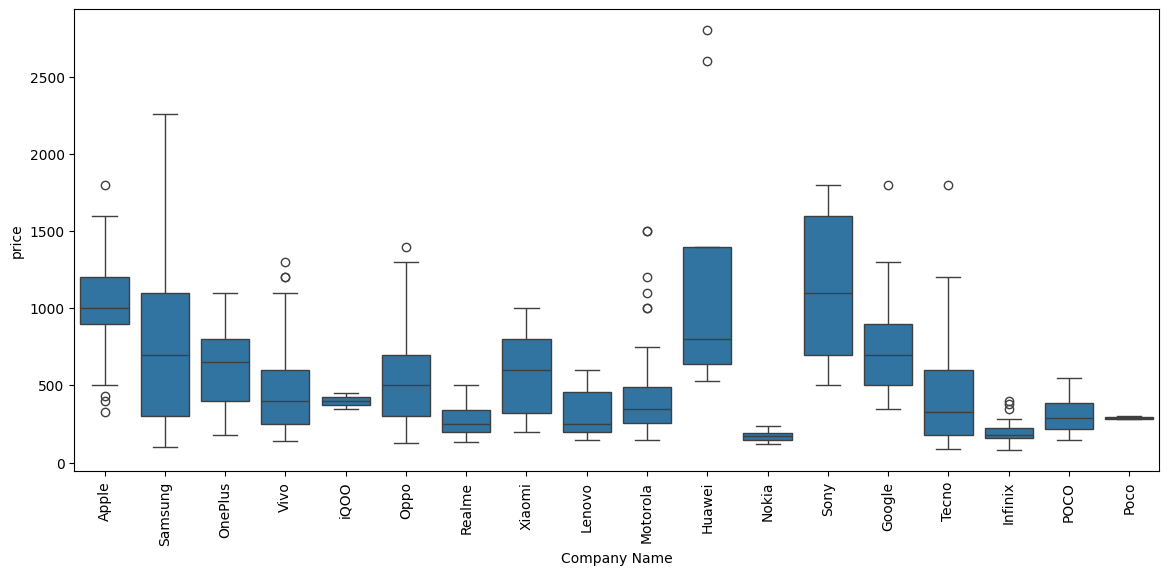

In [81]:
box_plot(cleaned, 'Company Name', 'price')

In [82]:
# cleaned.drop(cleaned[cleaned['price'] > 1400].index, inplace=True)

In [83]:
cleaned.drop(cleaned[cleaned['price'] > (Q3 + 1.5 * IQR)].index, inplace=True)
cleaned.drop(cleaned[cleaned['price'] < (Q1 - 1.5 * IQR)].index, inplace=True)

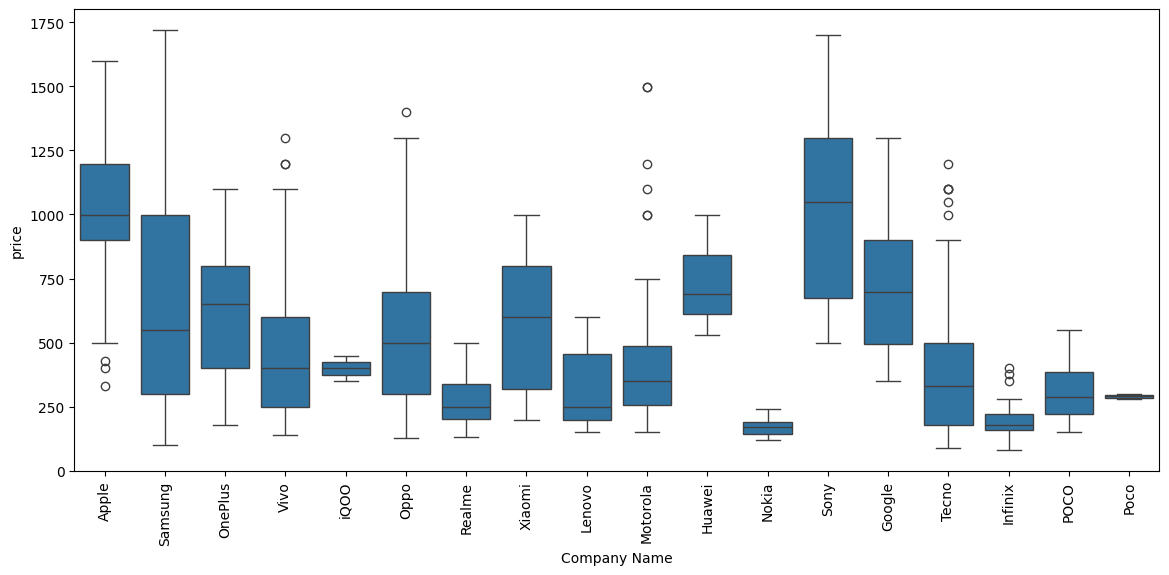

In [84]:
box_plot(cleaned, 'Company Name', 'price')

##Preparing data for modelling

###Dropping columns

In [85]:
cleaned.drop(['Model Name', 'Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)', 'Launched Price (Dubai)', 'Launched Price (USA)'], axis=1, inplace=True)

In [86]:
cleaned.columns

Index(['Company Name', 'Mobile Weight', 'RAM', 'Processor', 'Battery Capacity',
       'Screen Size', 'Launched Year', 'Back Camera 1', 'Back Camera 2',
       'Back Camera 3', 'Back Camera 4', 'Front Camera 1', 'Front Camera 2',
       'Storage', 'price'],
      dtype='object')

In [87]:
cleaned_Mobile_Prices = cleaned.copy()

#Phone Prices Cleanup

##Set up

In [88]:
use_mean = True
use_median = False

In [89]:
# use_mean = False
# use_median = False
# choice = ''
# while choice not in ['1', '2', '3']:
#   print('1. Use mean')
#   print('2. Use median')
#   print('3. Use mode')
#   choice = input('Enter your choice:')

# if choice == '1':
#   use_mean = True
# elif choice == '2':
#   use_median = True

##Importing Dataset

In [90]:
data = pd.read_csv('cleaned_all_phones.csv')

data.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


In [91]:
data.columns

Index(['phone_name', 'brand', 'os', 'inches', 'resolution', 'battery',
       'battery_type', 'ram(GB)', 'announcement_date', 'weight(g)',
       'storage(GB)', 'video_720p', 'video_1080p', 'video_4K', 'video_8K',
       'video_30fps', 'video_60fps', 'video_120fps', 'video_240fps',
       'video_480fps', 'video_960fps', 'price(USD)'],
      dtype='object')

In [92]:
data.shape

(1512, 22)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   phone_name         1512 non-null   object 
 1   brand              1512 non-null   object 
 2   os                 1512 non-null   object 
 3   inches             1512 non-null   float64
 4   resolution         1512 non-null   object 
 5   battery            1512 non-null   int64  
 6   battery_type       1512 non-null   object 
 7   ram(GB)            1512 non-null   int64  
 8   announcement_date  1512 non-null   object 
 9   weight(g)          1512 non-null   float64
 10  storage(GB)        1512 non-null   int64  
 11  video_720p         1512 non-null   bool   
 12  video_1080p        1512 non-null   bool   
 13  video_4K           1512 non-null   bool   
 14  video_8K           1512 non-null   bool   
 15  video_30fps        1512 non-null   bool   
 16  video_60fps        1512 

In [94]:
data.describe()

,inches,battery,ram(GB),weight(g),storage(GB),price(USD)
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,6.422460,4389.798942,6.683862,187.636243,109.164683,337.847036
std,0.477043,784.607022,2.701433,26.200115,74.436484,266.740821
min,3.800000,1821.000000,1.000000,130.000000,1.000000,40.000000
25%,6.300000,4000.000000,4.000000,175.000000,64.000000,179.997500
50%,6.500000,4500.000000,8.000000,187.000000,128.000000,260.000000
75%,6.670000,5000.000000,8.000000,197.250000,128.000000,400.000000
max,10.400000,7250.000000,24.000000,500.000000,512.000000,2300.000000


In [95]:
for col in data.columns:
  print(data[col].value_counts())
  print()

phone_name
V30              3
8 Pro            2
10 Pro           2
11               2
6                2
                ..
Find X2          1
Find X2 Pro      1
6 Pro            1
P40 lite E       1
Redmi Note 9S    1
Name: count, Length: 1496, dtype: int64

brand
Xiaomi     264
Oppo       213
Samsung    206
Vivo       168
Realme     157
Huawei     137
Honor      124
LG          75
OnePlus     47
Lenovo      43
Sony        37
Apple       22
Google      19
Name: count, dtype: int64

os
Android 11                322
Android 10                317
Android 12                233
Android 9.0               210
Android 13                154
Android 8.1                83
Android 8.0                55
Android 7.0                33
Android 7.1.1              17
Android 7.1                14
Android 7.1.2              13
Android 6.0                 6
EMUI 12                     6
Android 8.1 Oreo            5
iOS 16                      4
iOS 13                      4
iOS 14.1                    

Looking for null values

In [96]:
data.isnull().sum()

,0
phone_name,0
brand,0
os,0
inches,0
resolution,0
battery,0
battery_type,0
ram(GB),0
announcement_date,0
weight(g),0


Looking for duplicates

In [97]:
data.duplicated().sum()

np.int64(0)

##Cleaning


In [98]:
cleaned = data.copy()

cleaned['price'] = cleaned['price(USD)']
cleaned.drop('price(USD)', axis=1, inplace=True)

###Filling in missing string values with "Not Defined" and numerical values with either mean, mode or median

In [99]:
cleaned.isnull().sum()

,0
phone_name,0
brand,0
os,0
inches,0
resolution,0
battery,0
battery_type,0
ram(GB),0
announcement_date,0
weight(g),0


In [100]:
for col in cleaned.columns:
  if cleaned.dtypes[col] == 'object':
    cleaned[col] = cleaned[col].fillna(value = "Not Defined")
  elif use_mean:
    cleaned[col] = cleaned[col].fillna(cleaned[col].mean())
  elif use_median:
    cleaned[col] = cleaned[col].fillna(cleaned[col].median())
  else:
    cleaned[col] = cleaned[col].fillna(cleaned[col].mode()[0])

Rechecking nulls

In [101]:
cleaned.isnull().sum()

,0
phone_name,0
brand,0
os,0
inches,0
resolution,0
battery,0
battery_type,0
ram(GB),0
announcement_date,0
weight(g),0


Rechecking duplicates

In [102]:
cleaned.duplicated().sum()

np.int64(0)

###Separating resolution and also multiplying

In [103]:
cleaned[['resolution_width', 'resolution_height']] = cleaned['resolution'].str.split('x', expand=True)
cleaned.drop('resolution', axis=1, inplace=True)

In [104]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   phone_name         1512 non-null   object 
 1   brand              1512 non-null   object 
 2   os                 1512 non-null   object 
 3   inches             1512 non-null   float64
 4   battery            1512 non-null   int64  
 5   battery_type       1512 non-null   object 
 6   ram(GB)            1512 non-null   int64  
 7   announcement_date  1512 non-null   object 
 8   weight(g)          1512 non-null   float64
 9   storage(GB)        1512 non-null   int64  
 10  video_720p         1512 non-null   bool   
 11  video_1080p        1512 non-null   bool   
 12  video_4K           1512 non-null   bool   
 13  video_8K           1512 non-null   bool   
 14  video_30fps        1512 non-null   bool   
 15  video_60fps        1512 non-null   bool   
 16  video_120fps       1512 

In [105]:
cleaned['resolution_height'] = cleaned['resolution_height'].astype('int')
cleaned['resolution_width'] = cleaned['resolution_width'].astype('int')

In [106]:
cleaned['resolution'] = cleaned['resolution_height'] * cleaned['resolution_width']

###Finding OS Brands

In [107]:
print(cleaned['os'].unique())

['Android 5.1' 'Android 7.0' 'Android 6.0' 'Android 7.1' 'Android 6'
 'Android 7.0.1' 'Android 6.0.1' 'Android 7.1.1' 'Tizen 3.0' 'Android 8.0'
 'Android 7.1.2' 'iOS 11' 'iOS 11.1.1' 'Android 8.1' 'Android 8.0 Oreo'
 'Android 9.0' 'Android 8.1 Oreo' 'iOS 12' 'Android 9.0 Pie' 'Android 10'
 'iOS 13' 'Android 11' 'iOS 14.1' 'Android 10/ Android 11' 'iOS 15'
 'Android 12' 'iOS 15.4' 'EMUI 12' 'Android' 'Android 12L' 'iOS 16'
 'Android 13' 'Android 12 or 13' 'EMUI 13']


In [108]:
os_unique = []
for val in cleaned['os']:
  if 'Android' in val:
    os_unique.append('Android')
  elif 'iOS' in val:
    os_unique.append('iOS')
  elif 'Tizen' in val:
    os_unique.append('Tizen')
  elif 'EMUI' in val:
    os_unique.append('EMUI')
  else:
    print('ERROR: ', val, ' not accounted for')

In [109]:
cleaned['os_brands'] = os_unique

###Pixels per inch

In [110]:
cleaned['ppi']=(((cleaned['resolution_height']**2) + (cleaned['resolution_width']**2))**0.5/cleaned['inches']).astype('float')

###Extracting Year

In [111]:
# cleaned['announcement_date'] = pd.to_datetime(cleaned['announcement_date'])
# cleaned['year'] = cleaned['announcement_date'].dt.year

###Anomally handling

Helper function to polt the box plots

In [112]:
Q3 = cleaned['price'].quantile(0.75)
Q1 = cleaned['price'].quantile(0.25)
IQR = Q3 - Q1
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

Q1: 179.9975
Q3: 400.0
IQR: 220.0025


In [113]:
print(Q3 + 1.5 * IQR)
cleaned[cleaned['price'] > (Q3 + 1.5 * IQR)]

730.00375


,phone_name,brand,os,inches,battery,battery_type,ram(GB),announcement_date,weight(g),storage(GB),...,video_120fps,video_240fps,video_480fps,video_960fps,price,resolution_width,resolution_height,resolution,os_brands,ppi
133,Y3 (2018),Huawei,Android 8.0 Oreo,5.00,2280,Li-Ion,1,2018-05-01,175.0,8,...,False,False,False,False,1300.0,480,854,409920,Android,195.930192
215,K1,Oppo,Android 8.1,6.40,3600,Li-Ion,6,2018-10-01,156.0,64,...,False,False,False,False,1350.0,1080,2340,2527200,Android,402.688717
232,Enjoy 9,Huawei,Android 8.1,6.26,4000,Li-Po,4,2018-12-01,168.0,32,...,False,False,False,False,800.0,720,1520,1094400,Android,268.674710
234,nova 4,Huawei,Android 9.0,6.40,3750,Li-Po,8,2018-12-01,172.0,128,...,False,False,False,False,1200.0,1080,2310,2494800,Android,398.437500
333,7 Pro 5G,OnePlus,Android 9.0,6.67,4000,Li-Po,6,2019-05-14,206.0,128,...,True,True,True,False,800.0,1440,3120,4492800,Android,515.183966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,Magic V2,Honor,Android 13,7.92,5000,Li-Po,16,2023-07-12,231.0,256,...,False,False,False,False,1130.0,2156,2344,5053664,Android,402.115681
1494,K11,Oppo,Android 13,6.70,5000,Li-Po,8,2023-07-25,184.0,256,...,True,False,False,False,759.0,1080,2400,2592000,Android,392.806786
1496,Galaxy Z Flip5,Samsung,Android 13,6.70,3700,Li-Po,8,2023-07-26,187.0,256,...,True,True,False,True,899.0,1080,2640,2851200,Android,425.726483
1497,Galaxy Z Fold5,Samsung,Android 13,7.60,4400,Li-Po,12,2023-07-26,253.0,256,...,True,True,False,True,1498.2,1812,2176,3942912,Android,372.587345


In [114]:
cleaned[cleaned['price'] < (Q1 - 1.5 * IQR)]

,phone_name,brand,os,inches,battery,battery_type,ram(GB),announcement_date,weight(g),storage(GB),...,video_120fps,video_240fps,video_480fps,video_960fps,price,resolution_width,resolution_height,resolution,os_brands,ppi


In [115]:
def box_plot(df, x, y):
  plt.figure(figsize=(14,6))
  sns.boxplot(x=df[x], y=df[y])
  plt.xticks(rotation='vertical')
  plt.show()

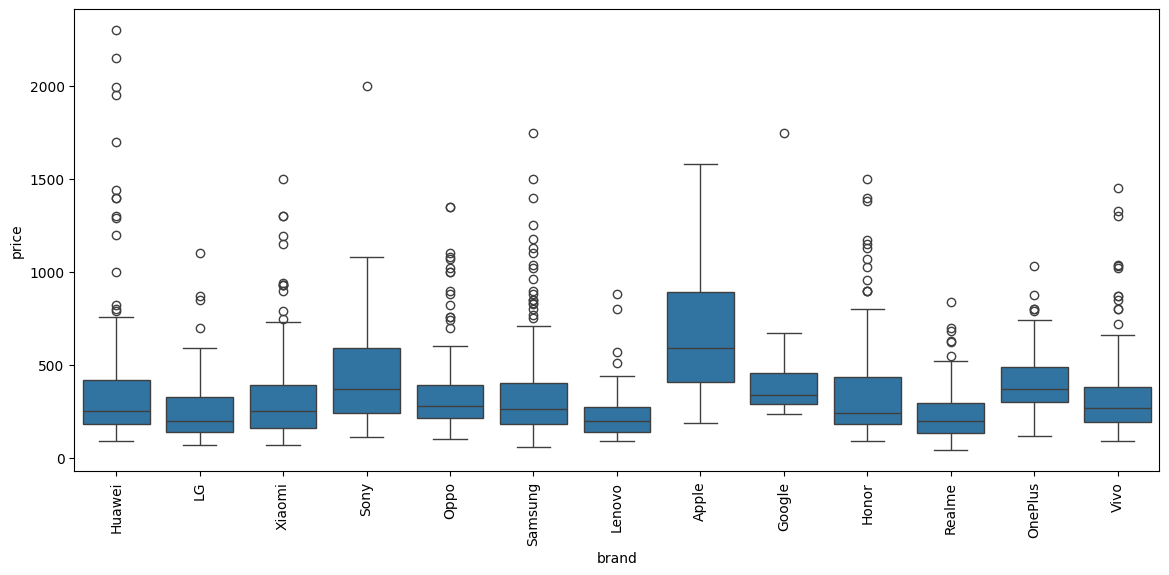

In [116]:
box_plot(cleaned, 'brand', 'price')

In [117]:
# cleaned.drop(cleaned[cleaned['price'] > 1400].index, inplace=True)

In [118]:
cleaned.drop(cleaned[cleaned['price'] > (Q3 + 1.5 * IQR)].index, inplace=True)
cleaned.drop(cleaned[cleaned['price'] < (Q1 - 1.5 * IQR)].index, inplace=True)

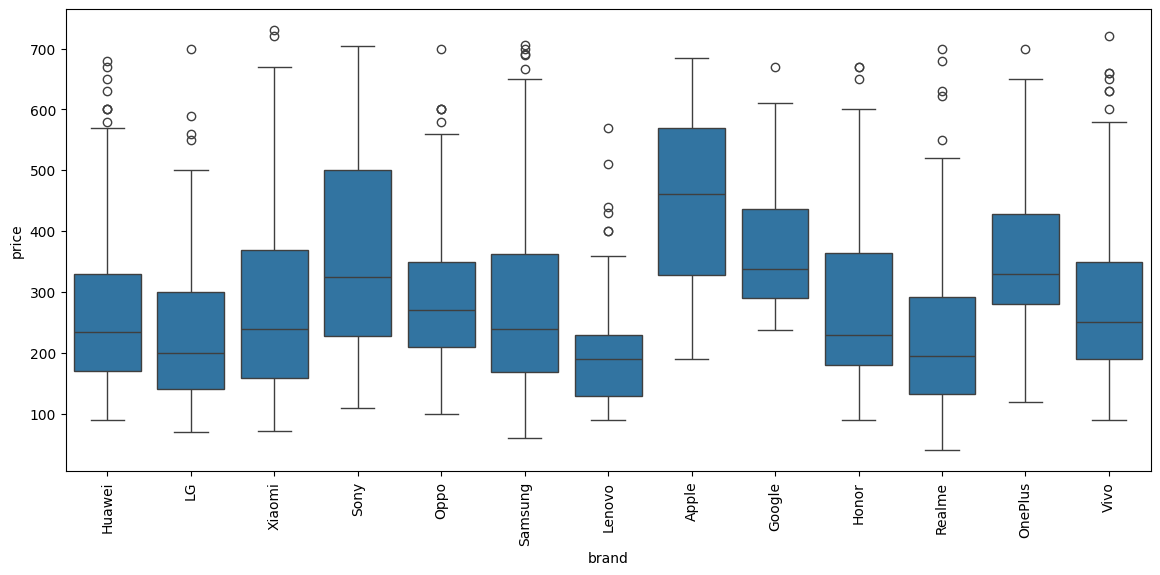

In [119]:
box_plot(cleaned, 'brand', 'price')

##Preparing data for modelling

###Dropping columns

In [120]:
cleaned.drop('phone_name', inplace=True, axis=1)

In [121]:
cleaned_Phone_Prices = cleaned.copy()

#Saving cleaned datasets as CSVs

In [122]:
cleaned_Phone_Prices.to_csv('Cleaned cleaned_all_phones.csv', index=False)
cleaned_Mobile_Prices.to_csv('Cleaned Mobiles Dataset (2025).csv', index=False)
cleaned_Real_Phones.to_csv('Cleaned smartphones.csv', index=False)

The models shall be trained on these cleaned versions of the datasets.

#Real World Smartphone's Dataset Random Forest

##Set up

In [123]:
use_grid_search = False

use_mean = True
use_median = False

use_feature_selection = False

In [124]:
# use_mean = False
# use_median = False
# choice = ''
# while choice not in ['1', '2', '3']:
#   print('1. Use mean')
#   print('2. Use median')
#   print('3. Use mode')
#   choice = input('Enter your choice:')

# if choice == '1':
#   use_mean = True
# elif choice == '2':
#   use_median = True

# choice = ''
# while choice not in ['1', '2']:
#   print('1. Use Grid Search')
#   print('2. Use Default Parameters')
#   choice = input('Enter your choice:')

# if choice == '1':
#   use_grid_search = True
# else:
#   use_grid_search = False

##Importing Cleaned Dataset

In [125]:
cleaned = pd.read_csv('Cleaned smartphones.csv')

cleaned.head()

,brand_name,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,472.314400,7.3,0,bionic,6.0,2.65,3110.000000,0,4,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,569.201889,7.5,0,bionic,6.0,2.65,3110.000000,0,4,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,629.756570,7.4,1,bionic,6.0,3.10,4817.748194,0,4,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
3,apple,678.200315,7.5,1,bionic,6.0,3.10,4817.748194,0,4,128,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,823.531549,7.6,1,bionic,6.0,3.10,4817.748194,0,4,256,6.1,60,2,ios,12.0,12.0,0,2532,1170


##Preparing data for modelling

###Encoding Strings

In [126]:
string_cols = []
for col in cleaned.columns:
  if cleaned.dtypes[col] == 'object':
    string_cols.append(col)
    print(col)

cleaned.head()

brand_name
processor_brand
os


,brand_name,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,472.314400,7.3,0,bionic,6.0,2.65,3110.000000,0,4,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,569.201889,7.5,0,bionic,6.0,2.65,3110.000000,0,4,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,629.756570,7.4,1,bionic,6.0,3.10,4817.748194,0,4,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
3,apple,678.200315,7.5,1,bionic,6.0,3.10,4817.748194,0,4,128,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,823.531549,7.6,1,bionic,6.0,3.10,4817.748194,0,4,256,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [127]:
encoders = {}
for col in string_cols:
    encoder = TargetEncoder(target_type="continuous", smooth = 5)
    X = cleaned[col].values.reshape(-1, 1)
    encoder.fit(X, cleaned['price'])
    cleaned[col] = encoder.transform(X)
    encoders[col] = encoder

In [128]:
cleaned.columns

Index(['brand_name', 'price', 'avg_rating', '5G_or_not', 'processor_brand',
       'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'ram_capacity', 'internal_memory',
       'screen_size', 'refresh_rate', 'num_rear_cameras', 'os',
       'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'resolution_height', 'resolution_width'],
      dtype='object')

In [129]:
cleaned.isnull().sum()

,0
brand_name,0
price,0
avg_rating,0
5G_or_not,0
processor_brand,0
num_cores,0
processor_speed,0
battery_capacity,0
fast_charging_available,0
ram_capacity,0


##Building Model

###Loading X and y

In [130]:
X = cleaned.drop('price', axis=1)
y = cleaned['price']

In [131]:
print(X.shape)
print(y.shape)

(873, 19)
(873,)


###Feature Selection

In [132]:
sfm = SelectFromModel(RandomForestRegressor(), threshold="median")
sfm.fit(X, y)

X_new = sfm.transform(X)

Looking at features ranked and the ones selected.

In [133]:
importances = sfm.estimator_.feature_importances_
feature_scores = pd.DataFrame({
    'Feature': X.columns,
      'Importance': importances
}).sort_values(by='Importance', ascending = False),

print(feature_scores)

# Get the indices of the selected features
selected_feature_indices = sfm.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

print("Selected Features:", selected_feature_names)

(                      Feature  Importance
5             processor_speed    0.555878
1                  avg_rating    0.096095
8                ram_capacity    0.064251
0                  brand_name    0.048891
15       primary_camera_front    0.043980
17          resolution_height    0.038541
6            battery_capacity    0.028466
9             internal_memory    0.027378
10                screen_size    0.020783
3             processor_brand    0.016428
14        primary_camera_rear    0.014298
2                   5G_or_not    0.011102
16  extended_memory_available    0.008775
18           resolution_width    0.008667
11               refresh_rate    0.005976
12           num_rear_cameras    0.004976
13                         os    0.003998
7     fast_charging_available    0.000940
4                   num_cores    0.000578,)
Selected Features: Index(['brand_name', 'avg_rating', 'processor_brand', 'processor_speed',
       'battery_capacity', 'ram_capacity', 'internal_memory', 'sc

In [134]:
if use_feature_selection:
  X = X_new

###Splitting up training and testing data

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [136]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(698, 19)
(175, 19)
(698,)
(175,)


###Scaling Input Data

In [137]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###Finding best parameters

In [138]:
if use_grid_search:
  param_grid = {
      'max_depth': [50, 100, 150, 200],
      'max_features': ['sqrt', 'log2'],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4],
      'bootstrap': [False],
      'max_leaf_nodes': [50, 100, 150, 200],
      'n_estimators': [100, 150, 200, 250],
      'random_state': [42]
  }

In [139]:
if use_grid_search:
  grid_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, scoring='neg_mean_absolute_error', n_jobs=3, cv = 3)


In [140]:
if use_grid_search:
  grid_search.fit(X_train, y_train)

In [141]:
if use_grid_search:
  print(grid_search.best_params_)

###Building Random Forest Model

In [142]:
if use_grid_search:
  model = RandomForestRegressor(**grid_search.best_params_)
else: #use best paramaters found via grid search
  model = RandomForestRegressor(max_depth = 50, max_features =  'sqrt', min_samples_leaf = 1, min_samples_split = 2, bootstrap= False, max_leaf_nodes=200, n_estimators = 150,)

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      max_leaf_nodes=200, n_estimators=150)

##Testing Model

In [143]:
print(f'Train Accuracy: {model.score(X_train, y_train):.3f}')
print(f'Test Accuracy:  {model.score(X_test, y_test):.3f}')

Train Accuracy: 0.991
Test Accuracy:  0.902


In [144]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# y_pred = price_scaler.inverse_transform(y_pred.reshape(-1,1))
# y_test = price_scaler.inverse_transform(y_test.values.reshape(-1,1))

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred):.2f}')

Mean Absolute Error: 38.82
Mean Absolute Percentage Error: 0.14


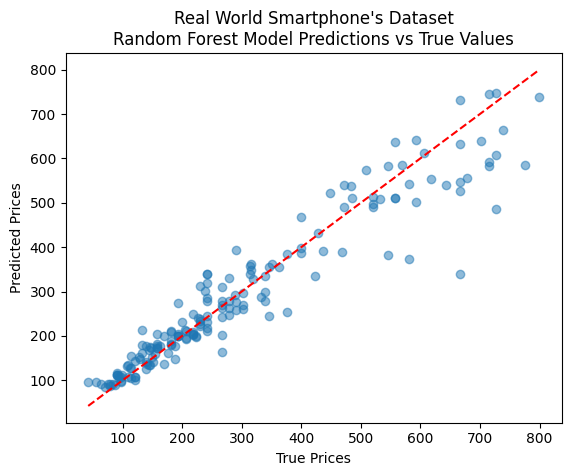

In [145]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("Real World Smartphone's Dataset\nRandom Forest Model Predictions vs True Values")
plt.show()

#Real World Smartphone's Dataset SVR

## Preprocessing

### The dataset

In [146]:
data = pd.read_csv("Cleaned smartphones.csv")
print(data.head())
y = data['price']

  brand_name       price  avg_rating  5G_or_not processor_brand  num_cores  \
0      apple  472.314400         7.3          0          bionic        6.0   
1      apple  569.201889         7.5          0          bionic        6.0   
2      apple  629.756570         7.4          1          bionic        6.0   
3      apple  678.200315         7.5          1          bionic        6.0   
4      apple  823.531549         7.6          1          bionic        6.0   

   processor_speed  battery_capacity  fast_charging_available  ram_capacity  \
0             2.65       3110.000000                        0             4   
1             2.65       3110.000000                        0             4   
2             3.10       4817.748194                        0             4   
3             3.10       4817.748194                        0             4   
4             3.10       4817.748194                        0             4   

   internal_memory  screen_size  refresh_rate  num_rear_

Using TargetEncoder to encode categorical features

In [147]:
encoder = TargetEncoder(target_type="continuous")
data['brand_name_encoded'] = encoder.fit_transform(data[['brand_name']], y)
data['processor_brand_encoded'] = encoder.fit_transform(data[['processor_brand']], y)
data['os_encoded'] = encoder.fit_transform(data[['os']], y)

del data['brand_name']
del data['processor_brand']
del data['os']

print(data.head())

        price  avg_rating  5G_or_not  num_cores  processor_speed  \
0  472.314400         7.3          0        6.0             2.65   
1  569.201889         7.5          0        6.0             2.65   
2  629.756570         7.4          1        6.0             3.10   
3  678.200315         7.5          1        6.0             3.10   
4  823.531549         7.6          1        6.0             3.10   

   battery_capacity  fast_charging_available  ram_capacity  internal_memory  \
0       3110.000000                        0             4               64   
1       3110.000000                        0             4              128   
2       4817.748194                        0             4               64   
3       4817.748194                        0             4              128   
4       4817.748194                        0             4              256   

   screen_size  refresh_rate  num_rear_cameras  primary_camera_rear  \
0          6.1            60                 

Drop samples with empty columns and separate features from target feature, price. Then select the top 10 features based on their mutual information (nat) score.

In [148]:
data = data.dropna()

y = data['price']
X = data.drop('price', axis=1)


mutual_info = mutual_info_regression(X, y)

# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': mutual_info,
}).sort_values(by='Score', ascending=False)

# Display the feature importance scores
print(feature_scores)

select = SelectKBest(mutual_info_regression, k=10).fit(X, y)
X = select.transform(X)
print(f"\nSelected Features: {select.get_feature_names_out()}")

                      Feature     Score
0                  avg_rating  0.783701
3             processor_speed  0.630173
6                ram_capacity  0.554195
7             internal_memory  0.478460
12       primary_camera_front  0.408139
17    processor_brand_encoded  0.379366
14          resolution_height  0.379254
11        primary_camera_rear  0.360922
15           resolution_width  0.325654
8                 screen_size  0.276378
13  extended_memory_available  0.264867
9                refresh_rate  0.262654
1                   5G_or_not  0.260774
4            battery_capacity  0.234198
16         brand_name_encoded  0.184663
5     fast_charging_available  0.158521
10           num_rear_cameras  0.158250
2                   num_cores  0.100326
18                 os_encoded  0.011685

Selected Features: ['avg_rating' 'processor_speed' 'ram_capacity' 'internal_memory'
 'screen_size' 'primary_camera_rear' 'primary_camera_front'
 'resolution_height' 'resolution_width' 'processor_bran

## Training and testing

Scaling features

In [149]:
sc_X = StandardScaler()
sc_y = StandardScaler()
scaled_X = sc_X.fit_transform(X)
scaled_y = sc_y.fit_transform(y.to_numpy().reshape(-1, 1))

Split the dataset into test data and training data

In [150]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.2)

Fit the training data to the model, and test by performing predictions on the test data

In [151]:
regressor = SVR()
regressor.fit(X_train, y_train)

pred = regressor.predict(X_test)
pred = pd.DataFrame(pred)

# Revert scaled values to price information
predicted_price = sc_y.inverse_transform(pred)
real_price = sc_y.inverse_transform(y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Summarize performance

Train coeff of determination: 0.8459665395565916
Test coeff of determination: 0.7819704696981586
MAE: $47.399386364925576
MAPE: 0.18688080831546797


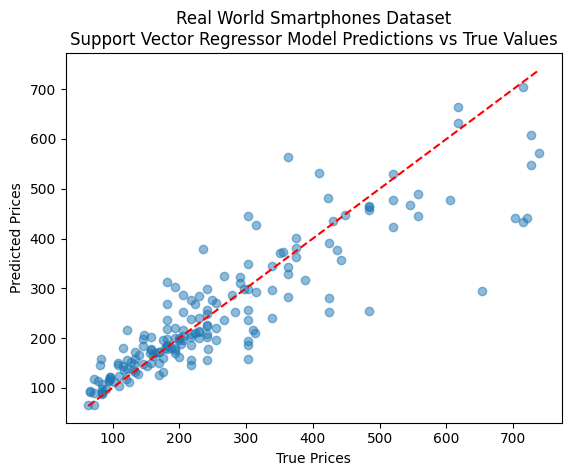

In [152]:
print(f"Train coeff of determination: {regressor.score(X_train, y_train)}")
print(f"Test coeff of determination: {regressor.score(X_test, y_test)}")
print(f"MAE: ${mean_absolute_error(real_price, predicted_price)}")
print(f"MAPE: {mean_absolute_percentage_error(real_price, predicted_price)}")

graph_points = len(y_test)
plt.scatter(real_price, predicted_price, alpha=0.5)
plt.plot([min(real_price), max(real_price)], [min(real_price), max(real_price)], 'r--')
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("Real World Smartphones Dataset\nSupport Vector Regressor Model Predictions vs True Values")
plt.show()

#Real World Smartphone's Dataset FNN

Using Sklearn and Keras

##Visualization Formatting

In [153]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

## Data Acquisition and Preprocessing
##### Importing and Cleaning initial Dataset for Processing

In [154]:
def read_csv(file_path):
    df = pd.read_csv(file_path)
    return df

def clean_data(df):
    df = df.drop_duplicates()
    df = df.dropna()
    df = df.reset_index(drop=True)
    return df

In [155]:
# np.random.seed(42)

In [156]:
smartphones = read_csv("Cleaned smartphones.csv")
cleaned_smartphones = clean_data(smartphones)
cleaned_smartphones.head()
cleaned_smartphones.info()

y = cleaned_smartphones["price"]
X = cleaned_smartphones.drop("price", axis=1)


categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    te = TargetEncoder(target_type="continuous", random_state=42, smooth = 'auto')
    data_array = X[col].values.reshape(-1, 1)
    X[col] = te.fit_transform(X[[col]], y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 870 non-null    object 
 1   price                      870 non-null    float64
 2   avg_rating                 870 non-null    float64
 3   5G_or_not                  870 non-null    int64  
 4   processor_brand            870 non-null    object 
 5   num_cores                  870 non-null    float64
 6   processor_speed            870 non-null    float64
 7   battery_capacity           870 non-null    float64
 8   fast_charging_available    870 non-null    int64  
 9   ram_capacity               870 non-null    int64  
 10  internal_memory            870 non-null    int64  
 11  screen_size                870 non-null    float64
 12  refresh_rate               870 non-null    int64  
 13  num_rear_cameras           870 non-null    int64  

##Building our Feedforward Neural Network

##### Splitting training and testing samples

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Scaling our Data for Processing

In [158]:
# Scale Features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
# Scale Target
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

##### Defining the Structure of the Neural Network

In [159]:
model = Sequential(name="Smartphones_NN")
model.add(Input(shape=(X_train_scaled.shape[1],)))# Input Layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3)) # Deactivates % of neurons if they are not improving performance
model.add(Dense(64, activation='relu')) # Hidden Layer 2
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu')) # Hidden Layer 3
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1)) # Output Layer

##### Compile Keras model aka Magic

In [160]:
model.compile(
    optimizer=Adam(learning_rate=0.005),
    loss=Huber(delta=1.0),  # Handles Outliers better than mse
    metrics=['mae']
)

In [161]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train_scaled shape:", y_train_scaled.shape)

X_train_scaled shape: (696, 19)
y_train_scaled shape: (696, 1)


##### Fitting keras model onto the dataset

In [162]:
batch_size = 64
early_stop = EarlyStopping(monitor='val_mae', patience=25, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_mae',
    factor=0.2,         # Reduce LR by 50%
    patience=10,         # Wait 5 epochs w/o improvement before reducing LR
    min_lr=1e-4,        # Smallest allowed LR
    verbose=1           # Print a message when LR changes
)
history = model.fit(X_train_scaled, y_train_scaled,
                    validation_data=(X_test_scaled, y_test_scaled),
                    epochs=200,
                    batch_size=batch_size,
                    verbose=1,
                    callbacks=[reduce_lr, early_stop])


# model.fit(X_train_scaled, y_train_scaled, batch_size=batch_size,steps_per_epoch=steps_per_epoch, epochs=10)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 408ms/step - loss: 0.6846 - mae: 1.0814 - val_loss: 0.3727 - val_mae: 0.7366 - learning_rate: 0.0050
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3824 - mae: 0.7296 - val_loss: 0.2590 - val_mae: 0.5946 - learning_rate: 0.0050
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2835 - mae: 0.6121 - val_loss: 0.1917 - val_mae: 0.4917 - learning_rate: 0.0050
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2320 - mae: 0.5325 - val_loss: 0.1665 - val_mae: 0.4540 - learning_rate: 0.0050
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1817 - mae: 0.4662 - val_loss: 0.1529 - val_mae: 0.4228 - learning_rate: 0.0050
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1691 - mae: 0.4380 - val_loss: 0.1358 - val_mae: 0.3882 - learning_rate: 0.0050
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1537 - mae: 0.4102 - val_loss: 0.1378 - val_mae: 0.3932 - learning_rate: 0.0050
Epoch 8/20

##### Making Predictions with our model

Evaluating model

In [163]:
# Get your scaled test predictions
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform BOTH predictions and true values
y_pred_dollars = scaler_y.inverse_transform(y_pred_scaled).flatten()
y_true_dollars = scaler_y.inverse_transform(y_test_scaled).flatten()

# Calculate MAE in original dollars
test_loss, test_mae = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"Test MAE: {test_mae:.4f}")
mae_dollars = mean_absolute_error(y_true_dollars, y_pred_dollars)

print(f"Official Test MAE (USD): ±${mae_dollars:.2f}")
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_true_dollars, y_pred_dollars):.2f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
Test MAE: 0.2993
Official Test MAE (USD): ±$49.46
Mean Absolute Percentage Error: 0.16


Bias Check

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Text(0.5, 1.0, 'Error Distribution')

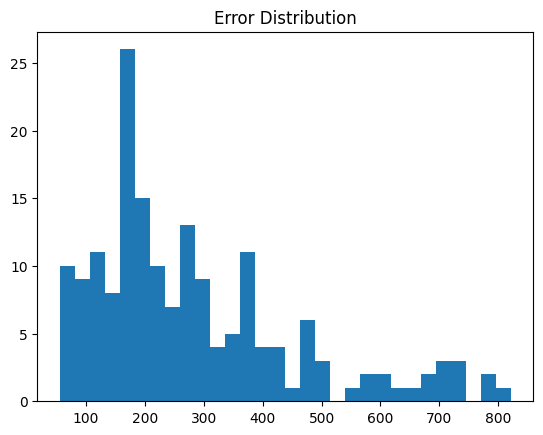

In [164]:
predictions = model.predict(X_test_scaled)
errors = y_test - predictions.flatten()
plt.hist(errors, bins=30)
plt.title("Error Distribution")

In [165]:
# Make predictions and compare with true values
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


##Plots

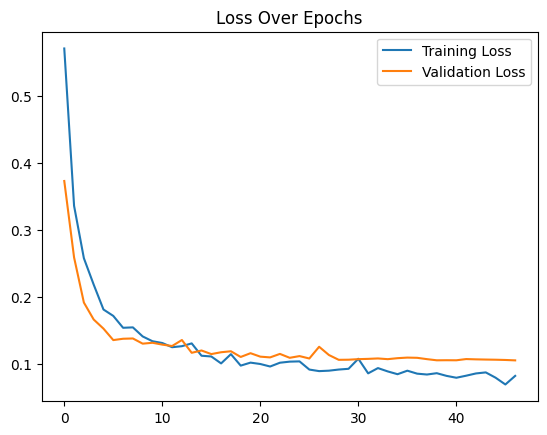

In [166]:
# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()



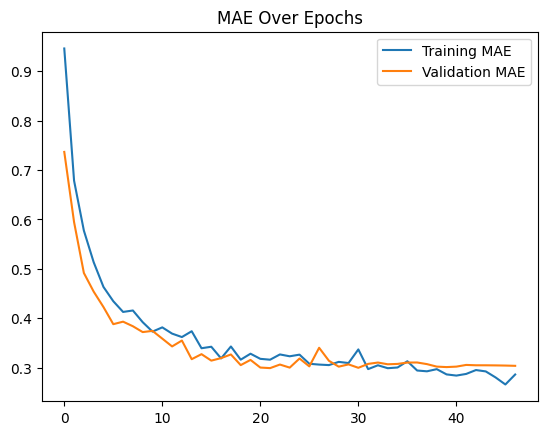

In [167]:
# Plot MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.legend()
plt.show()

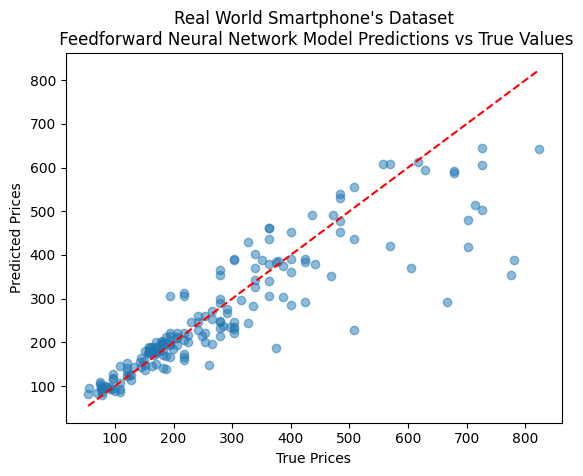

In [168]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("Real World Smartphone's Dataset\n Feedforward Neural Network Model Predictions vs True Values")
plt.show()

#Mobiles Dataset (2025) Random Forest

##Set up

In [169]:
use_grid_search = False
use_feature_selection = False

In [170]:
# choice = ''
# while choice not in ['1', '2']:
#   print('1. Use Grid Search')
#   print('2. Use Default Parameters')
#   choice = input('Enter your choice:')

# if choice == '1':
#   use_grid_search = True
# else:
#   use_grid_search = False


# choice = ''
# while choice not in ['1', '2']:
#   print('1. Use Feature Selection')
#   print('2. Do not use Feature Selection')
#   choice = input('Enter your choice:')

# if choice == '1':
#   use_feature_selection = True
# else:
#   use_feature_selection = False

##Importing Cleaned Dataset

In [171]:
cleaned = pd.read_csv("Cleaned Mobiles Dataset (2025).csv", encoding = "latin-1")

cleaned.head()

,Company Name,Mobile Weight,RAM,Processor,Battery Capacity,Screen Size,Launched Year,Back Camera 1,Back Camera 2,Back Camera 3,Back Camera 4,Front Camera 1,Front Camera 2,Storage,price
0,Apple,174.00,6.00,A17 Bionic,3600,6.10,2024,48,0,0,0,12,0,128,799.00
1,Apple,174.00,6.00,A17 Bionic,3600,6.10,2024,48,0,0,0,12,0,256,849.00
2,Apple,174.00,6.00,A17 Bionic,3600,6.10,2024,48,0,0,0,12,0,512,899.00
3,Apple,203.00,6.00,A17 Bionic,4200,6.70,2024,48,0,0,0,12,0,128,899.00
4,Apple,203.00,6.00,A17 Bionic,4200,6.70,2024,48,0,0,0,12,0,256,949.00


##Preparing data for modelling

###Encoding Strings

In [172]:
string_cols = []
for col in cleaned.columns:
  if cleaned.dtypes[col] == 'object':
    string_cols.append(col)
    print(col)

Company Name
Processor


In [173]:
encoders = {}
for col in string_cols:
    encoder = TargetEncoder(target_type="continuous", smooth = 5)
    X = cleaned[col].values.reshape(-1, 1)
    encoder.fit(X, cleaned['price'])
    cleaned[col] = encoder.transform(X)
    encoders[col] = encoder

In [174]:
cleaned.columns

Index(['Company Name', 'Mobile Weight', 'RAM', 'Processor', 'Battery Capacity',
       'Screen Size', 'Launched Year', 'Back Camera 1', 'Back Camera 2',
       'Back Camera 3', 'Back Camera 4', 'Front Camera 1', 'Front Camera 2',
       'Storage', 'price'],
      dtype='object')

##Building Model

###Loading X and y

In [175]:
X = cleaned.drop('price', axis=1)
y = cleaned['price']

In [176]:
print(X.shape)
print(y.shape)

(751, 14)
(751,)


###Feature Selection

In [177]:
sfm = SelectFromModel(RandomForestRegressor())
sfm.fit(X, y)

X_new = sfm.transform(X)

Looking at features ranked and the ones selected.

In [178]:
importances = sfm.estimator_.feature_importances_
feature_scores = pd.DataFrame({
    'Feature': X.columns,
      'Importance': importances
}).sort_values(by='Importance', ascending = False),

print(feature_scores)

# Get the indices of the selected features
selected_feature_indices = sfm.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

for col in X.columns:
  if col not in selected_feature_names:
    print("Unselected Features:", col)

(             Feature  Importance
3          Processor        0.78
1      Mobile Weight        0.04
0       Company Name        0.04
13           Storage        0.03
2                RAM        0.02
11    Front Camera 1        0.02
7      Back Camera 1        0.02
5        Screen Size        0.02
8      Back Camera 2        0.01
4   Battery Capacity        0.01
6      Launched Year        0.00
9      Back Camera 3        0.00
12    Front Camera 2        0.00
10     Back Camera 4        0.00,)
Unselected Features: Company Name
Unselected Features: Mobile Weight
Unselected Features: RAM
Unselected Features: Battery Capacity
Unselected Features: Screen Size
Unselected Features: Launched Year
Unselected Features: Back Camera 1
Unselected Features: Back Camera 2
Unselected Features: Back Camera 3
Unselected Features: Back Camera 4
Unselected Features: Front Camera 1
Unselected Features: Front Camera 2
Unselected Features: Storage


In [179]:
if use_feature_selection:
  X = X_new

###Splitting up training and testing data

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [181]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(600, 14)
(151, 14)
(600,)
(151,)


###Scaling Input Data

In [182]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###Finding best parameters

In [183]:
if use_grid_search:
  param_grid = {
      'max_depth': [50, 100, 150, 200],
      'max_features': ['sqrt', 'log2'],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4],
      'bootstrap': [False],
      'max_leaf_nodes': [50, 100, 150, 200],
      'n_estimators': [100, 150, 200, 250],
      'random_state': [42]
  }

In [184]:
if use_grid_search:
  grid_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, scoring='neg_mean_absolute_error', n_jobs=3, cv = 3, error_score='raise')


In [185]:
if use_grid_search:
  grid_search.fit(X_train, y_train)

In [186]:
if use_grid_search:
  print(grid_search.best_params_)

###Building Random Forest Model

In [187]:
if use_grid_search:
  model = RandomForestRegressor(**grid_search.best_params_)
else:
  params = {'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': 200, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

  model = RandomForestRegressor(**params)

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      max_leaf_nodes=200, n_estimators=150)

##Testing Model

In [188]:
print(f'Train Accuracy: {model.score(X_train, y_train):.3f}')
print(f'Test Accuracy:  {model.score(X_test, y_test):.3f}')

Train Accuracy: 0.997
Test Accuracy:  0.931


In [189]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# y_pred = price_scaler.inverse_transform(y_pred.reshape(-1,1))
# y_test = price_scaler.inverse_transform(y_test.values.reshape(-1,1))

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred):.2f}')

Mean Absolute Error: 65.86
Mean Absolute Percentage Error: 0.13


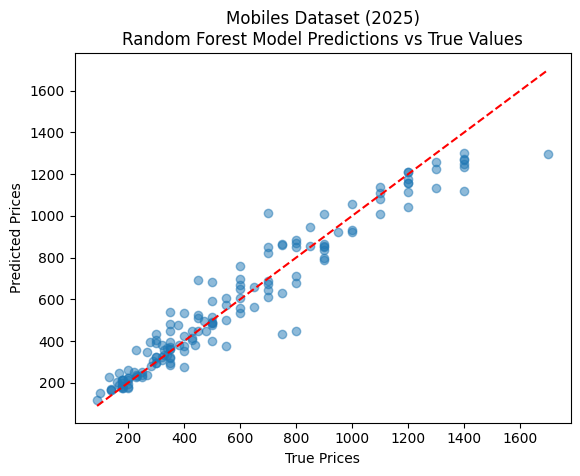

In [190]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("Mobiles Dataset (2025)\nRandom Forest Model Predictions vs True Values")
plt.show()

# Mobiles Dataset (2025) SVR

## Preprocessing

### The dataset

In [191]:
data = pd.read_csv("Cleaned Mobiles Dataset (2025).csv")
print(data.head())
y = data['price']

  Company Name  Mobile Weight  RAM   Processor  Battery Capacity  Screen Size  \
0        Apple         174.00 6.00  A17 Bionic              3600         6.10   
1        Apple         174.00 6.00  A17 Bionic              3600         6.10   
2        Apple         174.00 6.00  A17 Bionic              3600         6.10   
3        Apple         203.00 6.00  A17 Bionic              4200         6.70   
4        Apple         203.00 6.00  A17 Bionic              4200         6.70   

   Launched Year  Back Camera 1  Back Camera 2  Back Camera 3  Back Camera 4  \
0           2024             48              0              0              0   
1           2024             48              0              0              0   
2           2024             48              0              0              0   
3           2024             48              0              0              0   
4           2024             48              0              0              0   

   Front Camera 1  Front Camera 

Using TargetEncoder to encode categorical features

In [192]:
encoder = TargetEncoder(target_type="continuous")
data['Company Name_encoded'] = encoder.fit_transform(data[['Company Name']], y)
data['Processor_encoded'] = encoder.fit_transform(data[['Processor']], y)

del data['Company Name']
del data['Processor']

print(data.head())

   Mobile Weight  RAM  Battery Capacity  Screen Size  Launched Year  \
0         174.00 6.00              3600         6.10           2024   
1         174.00 6.00              3600         6.10           2024   
2         174.00 6.00              3600         6.10           2024   
3         203.00 6.00              4200         6.70           2024   
4         203.00 6.00              4200         6.70           2024   

   Back Camera 1  Back Camera 2  Back Camera 3  Back Camera 4  Front Camera 1  \
0             48              0              0              0              12   
1             48              0              0              0              12   
2             48              0              0              0              12   
3             48              0              0              0              12   
4             48              0              0              0              12   

   Front Camera 2  Storage  price  Company Name_encoded  Processor_encoded  
0        

Drop samples with empty columns and separate features from target feature, price. Then select the top 10 features based on their mutual information (nat) score.

In [193]:
data = data.dropna()

y = data['price']
X = data.drop('price', axis=1)

mutual_info = mutual_info_regression(X, y)

# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': mutual_info,
}).sort_values(by='Score', ascending=False)

# Display the feature importance scores
print(feature_scores)

select = SelectKBest(mutual_info_regression, k=10).fit(X, y)
X = select.transform(X)
print(f"\nSelected Features: {select.get_feature_names_out()}")

                 Feature  Score
13     Processor_encoded   0.86
9         Front Camera 1   0.48
6          Back Camera 2   0.42
3            Screen Size   0.38
2       Battery Capacity   0.35
12  Company Name_encoded   0.33
1                    RAM   0.32
11               Storage   0.29
0          Mobile Weight   0.29
5          Back Camera 1   0.28
7          Back Camera 3   0.11
4          Launched Year   0.02
8          Back Camera 4   0.00
10        Front Camera 2   0.00

Selected Features: ['Mobile Weight' 'RAM' 'Battery Capacity' 'Screen Size' 'Back Camera 1'
 'Back Camera 2' 'Front Camera 1' 'Storage' 'Company Name_encoded'
 'Processor_encoded']


## Training and testing

Scaling features

In [194]:
sc_X = StandardScaler()
sc_y = StandardScaler()
scaled_X = sc_X.fit_transform(X)
scaled_y = sc_y.fit_transform(y.to_numpy().reshape(-1, 1))

Split the dataset into test data and training data

In [195]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.2)

Fit the training data to the model, and test by performing predictions on the test data

In [196]:
regressor = SVR()
regressor.fit(X_train, y_train)

pred = regressor.predict(X_test)
pred = pd.DataFrame(pred)

# Revert scaled values to price information
predicted_price = sc_y.inverse_transform(pred)
real_price = sc_y.inverse_transform(y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Summarize performance

Train coeff of determination: 0.921530694141961
Test coeff of determination: 0.8450561726268415
MAE: $94.63440243551774
MAPE: 0.19810375226473928


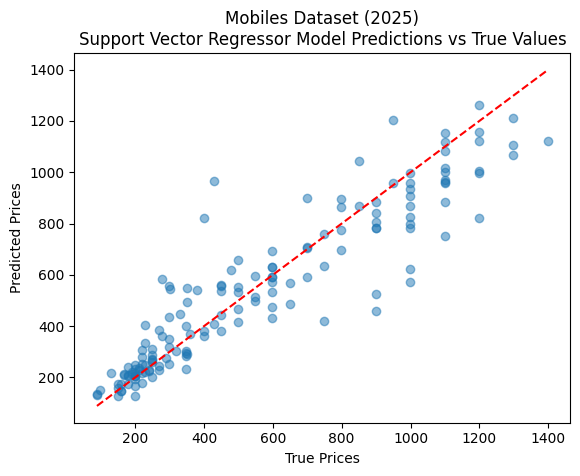

In [197]:
print(f"Train coeff of determination: {regressor.score(X_train, y_train)}")
print(f"Test coeff of determination: {regressor.score(X_test, y_test)}")
print(f"MAE: ${mean_absolute_error(real_price, predicted_price)}")
print(f"MAPE: {mean_absolute_percentage_error(real_price, predicted_price)}")

plt.scatter(real_price, predicted_price, alpha=0.5)
plt.plot([min(real_price), max(real_price)], [min(real_price), max(real_price)], 'r--')
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("Mobiles Dataset (2025)\nSupport Vector Regressor Model Predictions vs True Values")
plt.show()

#Mobiles Dataset (2025) FNN

Using Sklearn and Keras

##Visualization Formatting

In [198]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

## Data Acquisition and Preprocessing
##### Importing and Cleaning initial Dataset for Processing

In [199]:
def read_csv(file_path):
    df = pd.read_csv(file_path)
    return df

def clean_data(df):
    df = df.drop_duplicates()
    df = df.dropna()
    df = df.reset_index(drop=True)
    return df

In [200]:
np.random.seed(42)

In [201]:
smartphones = read_csv("Cleaned Mobiles Dataset (2025).csv")
cleaned_smartphones = clean_data(smartphones)
cleaned_smartphones.head()
cleaned_smartphones.info()

y = cleaned_smartphones["price"]
X = cleaned_smartphones.drop("price", axis=1)


categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    te = TargetEncoder(target_type="continuous", random_state=42, smooth = 'auto')
    data_array = X[col].values.reshape(-1, 1)
    X[col] = te.fit_transform(X[[col]], y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company Name      736 non-null    object 
 1   Mobile Weight     736 non-null    float64
 2   RAM               736 non-null    float64
 3   Processor         736 non-null    object 
 4   Battery Capacity  736 non-null    int64  
 5   Screen Size       736 non-null    float64
 6   Launched Year     736 non-null    int64  
 7   Back Camera 1     736 non-null    int64  
 8   Back Camera 2     736 non-null    int64  
 9   Back Camera 3     736 non-null    int64  
 10  Back Camera 4     736 non-null    int64  
 11  Front Camera 1    736 non-null    int64  
 12  Front Camera 2    736 non-null    int64  
 13  Storage           736 non-null    int64  
 14  price             736 non-null    float64
dtypes: float64(4), int64(9), object(2)
memory usage: 86.4+ KB


##Building our Feedforward Neural Network

##### Splitting training and testing samples

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Scaling our Data for Processing

In [203]:
# Scale Features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
# Scale Target
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

##### Defining the Structure of the Neural Network

In [204]:
model = Sequential(name="Smartphones_NN")
model.add(Input(shape=(X_train_scaled.shape[1],)))# Input Layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3)) # Deactivates % of neurons if they are not improving performance
model.add(Dense(64, activation='relu')) # Hidden Layer 2
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu')) # Hidden Layer 3
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1)) # Output Layer

##### Compile Keras model aka Magic

In [205]:
model.compile(
    optimizer=Adam(learning_rate=0.005),
    loss=Huber(delta=1.0),  # Handles Outliers better than mse
    metrics=['mae']
)

In [206]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train_scaled shape:", y_train_scaled.shape)

X_train_scaled shape: (588, 14)
y_train_scaled shape: (588, 1)


##### Fitting keras model onto the dataset

In [207]:
batch_size = 64
early_stop = EarlyStopping(monitor='val_mae', patience=25, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_mae',
    factor=0.2,         # Reduce LR by 50%
    patience=10,         # Wait 5 epochs w/o improvement before reducing LR
    min_lr=1e-4,        # Smallest allowed LR
    verbose=1           # Print a message when LR changes
)
history = model.fit(X_train_scaled, y_train_scaled,
                    validation_data=(X_test_scaled, y_test_scaled),
                    epochs=200,
                    batch_size=batch_size,
                    verbose=1,
                    callbacks=[reduce_lr, early_stop])


# model.fit(X_train_scaled, y_train_scaled, batch_size=batch_size,steps_per_epoch=steps_per_epoch, epochs=10)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 440ms/step - loss: 0.6905 - mae: 1.0899 - val_loss: 0.3510 - val_mae: 0.7316 - learning_rate: 0.0050
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5025 - mae: 0.8738 - val_loss: 0.2332 - val_mae: 0.5733 - learning_rate: 0.0050
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3635 - mae: 0.7008 - val_loss: 0.2227 - val_mae: 0.5661 - learning_rate: 0.0050
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2798 - mae: 0.5938 - val_loss: 0.2051 - val_mae: 0.5460 - learning_rate: 0.0050
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2730 - mae: 0.5812 - val_loss: 0.1811 - val_mae: 0.5068 - learning_rate: 0.0050
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2449 - mae: 0.5514 - val_loss: 0.1842 - val_mae: 0.5024 - learning_rate: 0.0050
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2187 - mae: 0.5095 - val_loss: 0.1396 - val_mae: 0.4294 - learning_rate: 0.0050
Epoch 8/2

##### Making Predictions with our model

Evaluating model

In [208]:
# Get your scaled test predictions
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform BOTH predictions and true values
y_pred_dollars = scaler_y.inverse_transform(y_pred_scaled).flatten()
y_true_dollars = scaler_y.inverse_transform(y_test_scaled).flatten()

# Calculate MAE in original dollars
test_loss, test_mae = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"Test MAE: {test_mae:.4f}")
mae_dollars = mean_absolute_error(y_true_dollars, y_pred_dollars)

print(f"Official Test MAE (USD): ±${mae_dollars:.2f}")
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_true_dollars, y_pred_dollars):.2f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
Test MAE: 0.2437
Official Test MAE (USD): ±$86.65
Mean Absolute Percentage Error: 0.18


Bias Check

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Text(0.5, 1.0, 'Error Distribution')

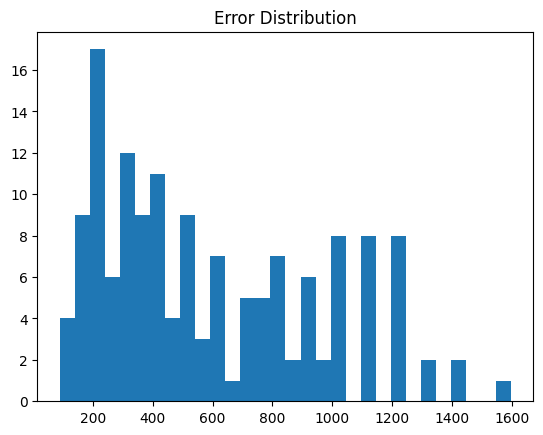

In [209]:
predictions = model.predict(X_test_scaled)
errors = y_test - predictions.flatten()
plt.hist(errors, bins=30)
plt.title("Error Distribution")

In [210]:
# Make predictions and compare with true values
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


##Plots

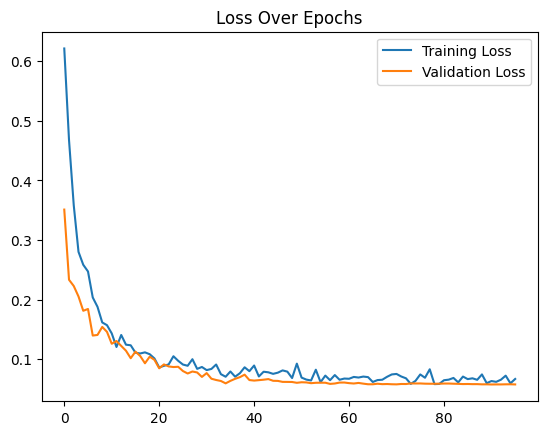

In [211]:
# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()



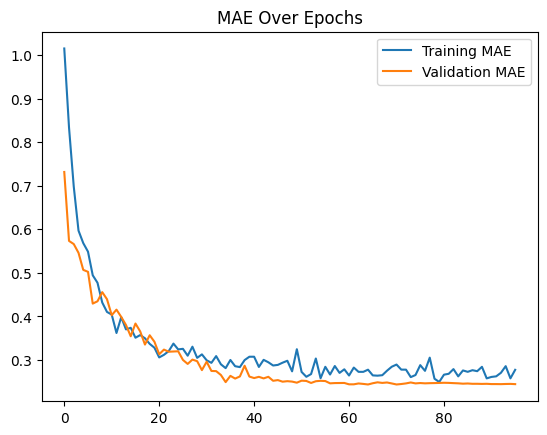

In [212]:
# Plot MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.legend()
plt.show()

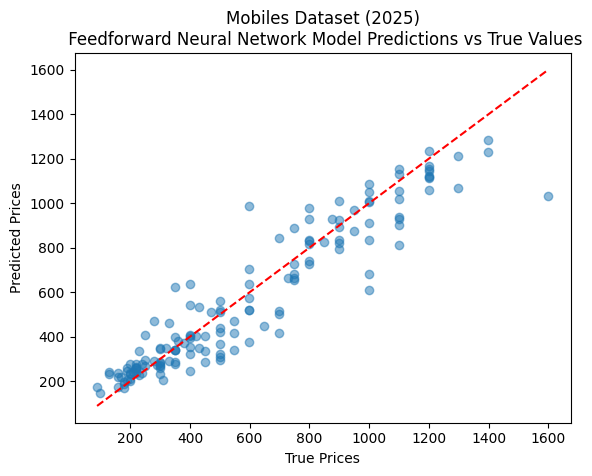

In [213]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("Mobiles Dataset (2025)\n Feedforward Neural Network Model Predictions vs True Values")
plt.show()

#Phone Prices Random Forest

##Set up

In [214]:
use_grid_search = False
use_feature_selection = True

use_mean = True
use_median = False

In [215]:
# use_mean = False
# use_median = False
# choice = ''
# while choice not in ['1', '2', '3']:
#   print('1. Use mean')
#   print('2. Use median')
#   print('3. Use mode')
#   choice = input('Enter your choice:')

# if choice == '1':
#   use_mean = True
# elif choice == '2':
#   use_median = True

# choice = ''
# while choice not in ['1', '2']:
#   print('1. Use Grid Search')
#   print('2. Use Default Parameters')
#   choice = input('Enter your choice:')

# if choice == '1':
#   use_grid_search = True
# else:
#   use_grid_search = False

##Importing Cleaned Dataset

In [216]:
cleaned = pd.read_csv('Cleaned cleaned_all_phones.csv')

cleaned.head()

,brand,os,inches,battery,battery_type,ram(GB),announcement_date,weight(g),storage(GB),video_720p,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price,resolution_width,resolution_height,resolution,os_brands,ppi
0,Huawei,Android 5.1,5.00,2200,Li-Po,2,2016-09-01,140.00,16,True,False,False,False,True,False,False,False,False,False,120.00,720,1280,921600,Android,293.72
1,LG,Android 7.0,5.30,2700,Li-Ion,2,2016-12-01,140.00,16,False,True,False,False,True,False,False,False,False,False,100.00,720,1280,921600,Android,277.10
2,Huawei,Android 7.0,5.20,3000,Li-Ion,4,2017-01-01,147.00,16,False,True,False,False,True,False,False,False,False,False,420.00,1080,1920,2073600,Android,423.64
3,Xiaomi,Android 6.0,5.50,4100,Li-Po,4,2017-01-01,165.00,32,True,True,False,False,True,False,True,False,False,False,150.00,1080,1920,2073600,Android,400.53
4,Huawei,Android 7.0,5.10,3200,Li-Ion,4,2017-02-01,145.00,32,True,True,True,False,True,True,False,False,False,False,420.00,1080,1920,2073600,Android,431.94


##Preparing data for modelling

###Encoding Strings

In [217]:
string_cols = []
for col in cleaned.columns:
  if cleaned.dtypes[col] == 'object':
    string_cols.append(col)
    print(col)

cleaned.head()

brand
os
battery_type
announcement_date
os_brands


,brand,os,inches,battery,battery_type,ram(GB),announcement_date,weight(g),storage(GB),video_720p,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price,resolution_width,resolution_height,resolution,os_brands,ppi
0,Huawei,Android 5.1,5.00,2200,Li-Po,2,2016-09-01,140.00,16,True,False,False,False,True,False,False,False,False,False,120.00,720,1280,921600,Android,293.72
1,LG,Android 7.0,5.30,2700,Li-Ion,2,2016-12-01,140.00,16,False,True,False,False,True,False,False,False,False,False,100.00,720,1280,921600,Android,277.10
2,Huawei,Android 7.0,5.20,3000,Li-Ion,4,2017-01-01,147.00,16,False,True,False,False,True,False,False,False,False,False,420.00,1080,1920,2073600,Android,423.64
3,Xiaomi,Android 6.0,5.50,4100,Li-Po,4,2017-01-01,165.00,32,True,True,False,False,True,False,True,False,False,False,150.00,1080,1920,2073600,Android,400.53
4,Huawei,Android 7.0,5.10,3200,Li-Ion,4,2017-02-01,145.00,32,True,True,True,False,True,True,False,False,False,False,420.00,1080,1920,2073600,Android,431.94


In [218]:
encoders = {}
for col in string_cols:
    encoder = TargetEncoder(target_type="continuous", smooth = 5)
    X = cleaned[col].values.reshape(-1, 1)
    encoder.fit(X, cleaned['price'])
    cleaned[col] = encoder.transform(X)
    encoders[col] = encoder

In [219]:
cleaned.columns

Index(['brand', 'os', 'inches', 'battery', 'battery_type', 'ram(GB)',
       'announcement_date', 'weight(g)', 'storage(GB)', 'video_720p',
       'video_1080p', 'video_4K', 'video_8K', 'video_30fps', 'video_60fps',
       'video_120fps', 'video_240fps', 'video_480fps', 'video_960fps', 'price',
       'resolution_width', 'resolution_height', 'resolution', 'os_brands',
       'ppi'],
      dtype='object')

In [220]:
cleaned.isnull().sum()

,0
brand,0
os,0
inches,0
battery,0
battery_type,0
ram(GB),0
announcement_date,0
weight(g),0
storage(GB),0
video_720p,0


##Building Model

###Loading X and y

In [221]:
X = cleaned.drop('price', axis=1)
y = cleaned['price']

In [222]:
print(X.shape)
print(y.shape)

(1401, 24)
(1401,)


###Feature Selection

In [223]:
sfm = SelectFromModel(RandomForestRegressor())
sfm.fit(X, y)

X_new = sfm.transform(X)

Looking at features ranked and the ones selected.

In [224]:
importances = sfm.estimator_.feature_importances_
feature_scores = pd.DataFrame({
    'Feature': X.columns,
      'Importance': importances
}).sort_values(by='Importance', ascending = False),

print(feature_scores)

# Get the indices of the selected features
selected_feature_indices = sfm.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

for col in X.columns:
  if col not in selected_feature_names:
    print("Unselected Features:", col)

(              Feature  Importance
6   announcement_date        0.54
7           weight(g)        0.07
23                ppi        0.06
0               brand        0.05
3             battery        0.05
2              inches        0.04
1                  os        0.03
21         resolution        0.02
5             ram(GB)        0.02
20  resolution_height        0.02
8         storage(GB)        0.02
14        video_60fps        0.01
11           video_4K        0.01
4        battery_type        0.01
9          video_720p        0.01
13        video_30fps        0.01
15       video_120fps        0.01
19   resolution_width        0.01
17       video_480fps        0.00
18       video_960fps        0.00
16       video_240fps        0.00
12           video_8K        0.00
22          os_brands        0.00
10        video_1080p        0.00,)
Unselected Features: os
Unselected Features: inches
Unselected Features: battery_type
Unselected Features: ram(GB)
Unselected Features: storage(GB)

In [225]:
if use_feature_selection:
  X = X_new

###Splitting up training and testing data

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [227]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1120, 5)
(281, 5)
(1120,)
(281,)


###Scaling Input Data

In [228]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###Finding best parameters

In [229]:
if use_grid_search:
  param_grid = {
      'max_depth': [50, 100, 150, 200],
      'max_features': ['sqrt', 'log2'],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4],
      'bootstrap': [False],
      'max_leaf_nodes': [50, 100, 150, 200],
      'n_estimators': [100, 150, 200, 250],
      'random_state': [42]
  }

In [230]:
if use_grid_search:
  grid_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, scoring='neg_mean_absolute_error', n_jobs=3, cv = 3, error_score='raise')


In [231]:
if use_grid_search:
  grid_search.fit(X_train, y_train)

In [232]:
if use_grid_search:
  print(grid_search.best_params_)

###Building Random Forest Model

In [233]:
if use_grid_search:
  model = RandomForestRegressor(**grid_search.best_params_)
else: #use best result from grid search
  model = RandomForestRegressor(max_depth = 100, max_features =  'sqrt', min_samples_leaf = 4, min_samples_split = 2, bootstrap= True, max_leaf_nodes=150, n_estimators = 250)


model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', max_leaf_nodes=150,
                      min_samples_leaf=4, n_estimators=250)

##Testing Model

In [234]:
print(f'Train Accuracy: {model.score(X_train, y_train):.3f}')
print(f'Test Accuracy:  {model.score(X_test, y_test):.3f}')

Train Accuracy: 0.733
Test Accuracy:  0.466


In [235]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred):.2f}')

Mean Absolute Error: 73.24
Mean Absolute Percentage Error: 0.32


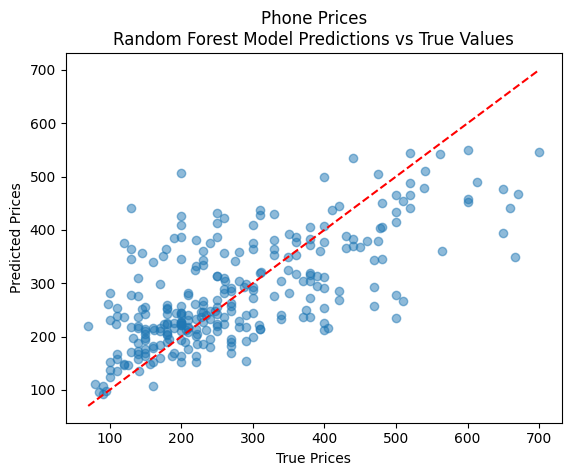

In [236]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("Phone Prices\nRandom Forest Model Predictions vs True Values")
plt.show()

# Phone Prices SVR

## Preprocessing

### The dataset

In [237]:
data = pd.read_csv("Cleaned cleaned_all_phones.csv")
print(data.head())
y = data['price']

    brand           os  inches  battery battery_type  ram(GB)  \
0  Huawei  Android 5.1    5.00     2200        Li-Po        2   
1      LG  Android 7.0    5.30     2700       Li-Ion        2   
2  Huawei  Android 7.0    5.20     3000       Li-Ion        4   
3  Xiaomi  Android 6.0    5.50     4100        Li-Po        4   
4  Huawei  Android 7.0    5.10     3200       Li-Ion        4   

  announcement_date  weight(g)  storage(GB)  video_720p  video_1080p  \
0        2016-09-01     140.00           16        True        False   
1        2016-12-01     140.00           16       False         True   
2        2017-01-01     147.00           16       False         True   
3        2017-01-01     165.00           32        True         True   
4        2017-02-01     145.00           32        True         True   

   video_4K  video_8K  video_30fps  video_60fps  video_120fps  video_240fps  \
0     False     False         True        False         False         False   
1     False     Fa

Using TargetEncoder to encode categorical features

In [238]:
encoder = TargetEncoder(target_type="continuous")
data['brand_encoded'] = encoder.fit_transform(data[['brand']], y)
data['battery_type_encoded'] = encoder.fit_transform(data[['battery_type']], y)
data['os_encoded'] = encoder.fit_transform(data[['os_brands']], y)

data['announcement_year'] = pd.Series(data['announcement_date']).apply(lambda x: datetime.fromisoformat(x).year)
data['announcement_month'] = pd.Series(data['announcement_date']).apply(lambda x: datetime.fromisoformat(x).month)
data['announcement_day'] = pd.Series(data['announcement_date']).apply(lambda x: datetime.fromisoformat(x).day)
del data['announcement_date']
del data['brand']
del data['battery_type']
del data['os']
del data['os_brands']
del data['resolution_height']
del data['resolution_width']

print(data.head())

   inches  battery  ram(GB)  weight(g)  storage(GB)  video_720p  video_1080p  \
0    5.00     2200        2     140.00           16        True        False   
1    5.30     2700        2     140.00           16       False         True   
2    5.20     3000        4     147.00           16       False         True   
3    5.50     4100        4     165.00           32        True         True   
4    5.10     3200        4     145.00           32        True         True   

   video_4K  video_8K  video_30fps  video_60fps  video_120fps  video_240fps  \
0     False     False         True        False         False         False   
1     False     False         True        False         False         False   
2     False     False         True        False         False         False   
3     False     False         True        False          True         False   
4      True     False         True         True         False         False   

   video_480fps  video_960fps  price  resolu

Drop samples with empty columns and separate features from target feature, price. Then select the top 10 features based on their mutual information (nat) score.

In [239]:
data = data.dropna()

y = data['price']
X = data.drop('price', axis=1)

mutual_info = mutual_info_regression(X, y)

# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': mutual_info,
}).sort_values(by='Score', ascending=False)

# Display the feature importance scores
print(feature_scores)

select = SelectKBest(mutual_info_regression, k=10).fit(X, y)
X = select.transform(X)
print(f"\nSelected Features: {select.get_feature_names_out()}")

                 Feature  Score
16                   ppi   0.15
15            resolution   0.13
4            storage(GB)   0.11
5             video_720p   0.11
7               video_4K   0.10
2                ram(GB)   0.10
17         brand_encoded   0.08
1                battery   0.08
0                 inches   0.07
20     announcement_year   0.06
10           video_60fps   0.06
22      announcement_day   0.05
3              weight(g)   0.05
6            video_1080p   0.04
14          video_960fps   0.03
18  battery_type_encoded   0.02
12          video_240fps   0.01
8               video_8K   0.01
11          video_120fps   0.00
13          video_480fps   0.00
9            video_30fps   0.00
19            os_encoded   0.00
21    announcement_month   0.00

Selected Features: ['inches' 'battery' 'ram(GB)' 'storage(GB)' 'video_720p' 'video_4K'
 'video_60fps' 'resolution' 'ppi' 'brand_encoded']


## Training and testing

Scaling features

In [240]:
sc_X = StandardScaler()
sc_y = StandardScaler()
scaled_X = sc_X.fit_transform(X)
scaled_y = sc_y.fit_transform(y.to_numpy().reshape(-1, 1))

Split the dataset into test data and training data

In [241]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.2)

Fit the training data to the model, and test by performing predictions on the test data

In [242]:
regressor = SVR(kernel='linear', C=0.8)
regressor.fit(X_train, y_train)

pred = regressor.predict(X_test)
pred = pd.DataFrame(pred)

# Revert scaled values to price information
predicted_price = sc_y.inverse_transform(pred)
real_price = sc_y.inverse_transform(y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Summarize performance

Train coeff of determination: 0.17742932303277825
Test coeff of determination: 0.09839814526214441
MAE: $93.05139156200336
MAPE: 0.35850815157706867


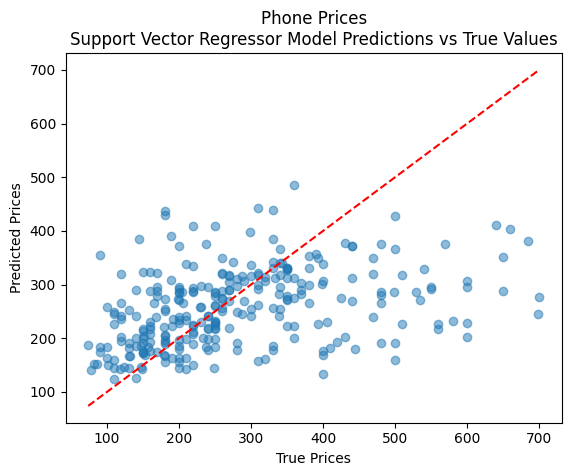

In [243]:
print(f"Train coeff of determination: {regressor.score(X_train, y_train)}")
print(f"Test coeff of determination: {regressor.score(X_test, y_test)}")
print(f"MAE: ${mean_absolute_error(real_price, predicted_price)}")
print(f"MAPE: {mean_absolute_percentage_error(real_price, predicted_price)}")

plt.scatter(real_price, predicted_price, alpha=0.5)
plt.plot([min(real_price), max(real_price)], [min(real_price), max(real_price)], 'r--')
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("Phone Prices\nSupport Vector Regressor Model Predictions vs True Values")
plt.show()

# Phone Prices FNN

Using Sklearn and Keras

##Visualization Formatting

In [244]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

## Data Acquisition and Preprocessing
##### Importing and Cleaning initial Dataset for Processing

In [245]:
def read_csv(file_path):
    df = pd.read_csv(file_path)
    return df

def clean_data(df):
    df = df.drop_duplicates()
    df = df.dropna()
    df = df.reset_index(drop=True)
    return df

In [246]:
# np.random.seed(42)

In [247]:
# smartphones = read_csv("CSVs Cleaned\Cleaned cleaned_all_phones.csv")
smartphones = read_csv("Cleaned cleaned_all_phones.csv")
cleaned_smartphones = clean_data(smartphones)
cleaned_smartphones.head()
cleaned_smartphones.info()

y = cleaned_smartphones["price"]
X = cleaned_smartphones.drop("price", axis=1)


categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    te = TargetEncoder(target_type="continuous", random_state=42, smooth = 'auto')
    data_array = X[col].values.reshape(-1, 1)
    X[col] = te.fit_transform(X[[col]], y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1399 non-null   object 
 1   os                 1399 non-null   object 
 2   inches             1399 non-null   float64
 3   battery            1399 non-null   int64  
 4   battery_type       1399 non-null   object 
 5   ram(GB)            1399 non-null   int64  
 6   announcement_date  1399 non-null   object 
 7   weight(g)          1399 non-null   float64
 8   storage(GB)        1399 non-null   int64  
 9   video_720p         1399 non-null   bool   
 10  video_1080p        1399 non-null   bool   
 11  video_4K           1399 non-null   bool   
 12  video_8K           1399 non-null   bool   
 13  video_30fps        1399 non-null   bool   
 14  video_60fps        1399 non-null   bool   
 15  video_120fps       1399 non-null   bool   
 16  video_240fps       1399 

##Building our Feedforward Neural Network

##### Splitting training and testing samples

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Scaling our Data for Processing

In [249]:
# Scale Features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
# Scale Target
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

##### Defining the Structure of the Neural Network

In [250]:
model = Sequential(name="Smartphones_NN")
model.add(Input(shape=(X_train_scaled.shape[1],)))# Input Layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3)) # Deactivates % of neurons if they are not improving performance
model.add(Dense(64, activation='relu')) # Hidden Layer 2
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu')) # Hidden Layer 3
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1)) # Output Layer

##### Compile Keras model aka Magic

In [251]:
model.compile(
    optimizer=Adam(learning_rate=0.005),
    loss=Huber(delta=1.0),  # Handles Outliers better than mse
    metrics=['mae']
)

In [252]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train_scaled shape:", y_train_scaled.shape)

X_train_scaled shape: (1119, 24)
y_train_scaled shape: (1119, 1)


##### Fitting keras model onto the dataset

In [253]:
batch_size = 64
early_stop = EarlyStopping(monitor='val_mae', patience=25, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_mae',
    factor=0.2,         # Reduce LR by 50%
    patience=10,         # Wait 5 epochs w/o improvement before reducing LR
    min_lr=1e-4,        # Smallest allowed LR
    verbose=1           # Print a message when LR changes
)
history = model.fit(X_train_scaled, y_train_scaled,
                    validation_data=(X_test_scaled, y_test_scaled),
                    epochs=200,
                    batch_size=batch_size,
                    verbose=1,
                    callbacks=[reduce_lr, early_stop])


# model.fit(X_train_scaled, y_train_scaled, batch_size=batch_size,steps_per_epoch=steps_per_epoch, epochs=10)

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 225ms/step - loss: 0.7859 - mae: 1.1935 - val_loss: 0.3265 - val_mae: 0.6844 - learning_rate: 0.0050
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5415 - mae: 0.9200 - val_loss: 0.3355 - val_mae: 0.6968 - learning_rate: 0.0050
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4283 - mae: 0.7968 - val_loss: 0.3084 - val_mae: 0.6582 - learning_rate: 0.0050
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3705 - mae: 0.7212 - val_loss: 0.2984 - val_mae: 0.6484 - learning_rate: 0.0050
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3534 - mae: 0.7050 - val_loss: 0.2934 - val_mae: 0.6399 - learning_rate: 0.0050
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3552 - mae: 0.7004 - val_loss: 0.2905 - val_mae: 0.6319 - learning_rate: 0.0050
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3376 - mae: 0.6765 - val_loss: 0.2904 - val_mae: 0.6300 - learning_rate: 0.0050
Epoch 8/200

##### Making Predictions with our model

Evaluating model

In [254]:
# Get your scaled test predictions
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform BOTH predictions and true values
y_pred_dollars = scaler_y.inverse_transform(y_pred_scaled).flatten()
y_true_dollars = scaler_y.inverse_transform(y_test_scaled).flatten()

# Calculate MAE in original dollars
test_loss, test_mae = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"Test MAE: {test_mae:.4f}")
mae_dollars = mean_absolute_error(y_true_dollars, y_pred_dollars)

print(f"Official Test MAE (USD): ±${mae_dollars:.2f}")
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_true_dollars, y_pred_dollars):.2f}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
Test MAE: 0.5857
Official Test MAE (USD): ±$84.05
Mean Absolute Percentage Error: 0.36


###### K-Fold Cross Validation to Debug model (3)

In [255]:
# # Initialize KFold (use same random_state as your train_test_split for consistency)
# kf = KFold(n_splits=3, shuffle=True, random_state=0)
# mae_scores, mape_scores = [], []

# clusters = KMeans(n_clusters=3).fit_predict(X)
# for fold, (train_idx, val_idx) in enumerate(StratifiedKFold(n_splits=3).split(X, clusters)):
#     print(f"\nFold {fold + 1}")

#     # Split raw data
#     X_train_raw, X_val_raw = X.iloc[train_idx], X.iloc[val_idx]
#     y_train_raw, y_val_raw = y.iloc[train_idx], y.iloc[val_idx]

#     # Scale features and target PER FOLD (critical!)
#     scaler_X = StandardScaler()
#     X_train_scaled = scaler_X.fit_transform(X_train_raw)
#     X_val_scaled = scaler_X.transform(X_val_raw)

#     scaler_y = StandardScaler()
#     y_train_scaled = scaler_y.fit_transform(y_train_raw.values.reshape(-1, 1))
#     y_val_scaled = scaler_y.transform(y_val_raw.values.reshape(-1, 1))

#     # Build and train model (using your best config: Adam lr=0.005)
#     model = Sequential([
#         Input(shape=(X_train_scaled.shape[1],)),
#         Dense(128, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.3),
#         Dense(64, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.4),
#         Dense(32, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.2),
#         Dense(1)
#     ])

#     model.compile(optimizer=Adam(learning_rate=0.005), loss='mae', metrics=['mae'])

#     reduce_lr = ReduceLROnPlateau(
#         monitor='val_mae',
#         factor=0.2,         # Reduce LR by 50%
#         patience=10,         # Wait 5 epochs w/o improvement before reducing LR
#         min_lr=1e-4,        # Smallest allowed LR
#         verbose=1           # Print a message when LR changes
#     )

#     history = model.fit(
#         X_train_scaled, y_train_scaled,
#         validation_data=(X_val_scaled, y_val_scaled),
#         epochs=100,
#         batch_size=64,
#         callbacks=[early_stop, reduce_lr],
#         verbose=0
#     )

#     # Evaluate and INVERSE TRANSFORM predictions to original USD scale
#     y_pred_scaled = model.predict(X_val_scaled)
#     y_pred = scaler_y.inverse_transform(y_pred_scaled)
#     mae = np.mean(np.abs(y_pred - y_val_raw.values.reshape(-1, 1)))
#     mape = np.mean(np.abs((y_val_raw.values - y_pred.flatten()) / y_val_raw.values)) * 100

#     mae_scores.append(mae)
#     mape_scores.append(mape)
#     print(f"Fold {fold + 1} | Test MAE: ${mae:.2f} | MAPE: {mape:.2f}%")

# print("\nFinal Metrics:")
# print(f"Mean MAE: ${np.mean(mae_scores):.2f} ± ${np.std(mae_scores):.2f}")
# print(f"Mean MAPE: {np.mean(mape_scores):.2f}% ± {np.std(mape_scores):.2f}%")

###### Bias Check

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Text(0.5, 1.0, 'Error Distribution')

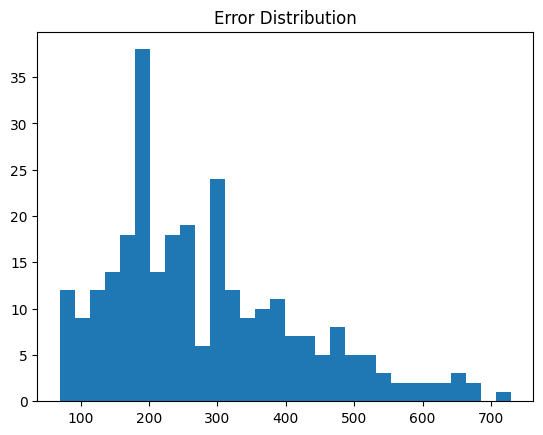

In [256]:
predictions = model.predict(X_test_scaled)
errors = y_test - predictions.flatten()
plt.hist(errors, bins=30)
plt.title("Error Distribution")

###### Prediction calculation

In [257]:
# Make predictions and compare with true values
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


##Plots

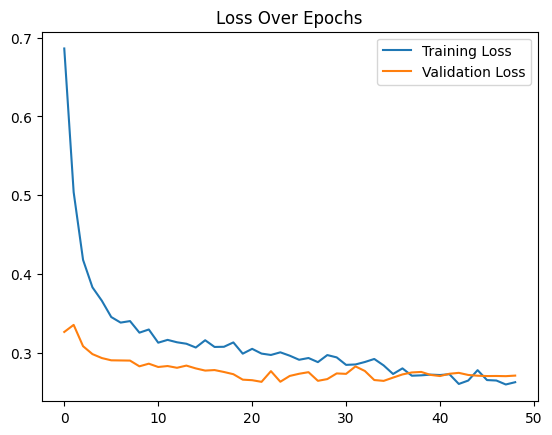

In [258]:
# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()



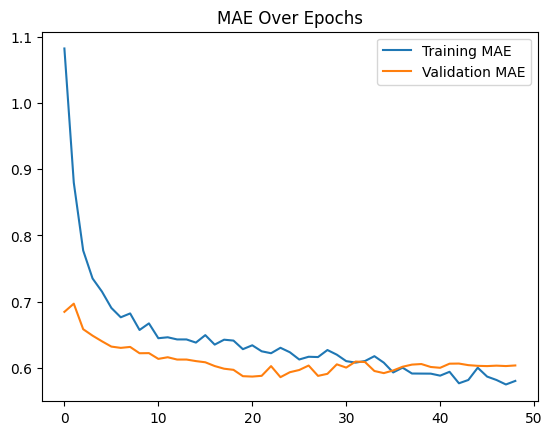

In [259]:
# Plot MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.legend()
plt.show()

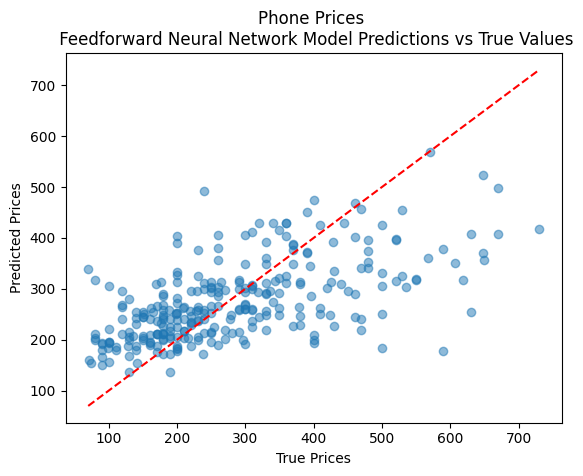

In [260]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("Phone Prices \n Feedforward Neural Network Model Predictions vs True Values")
plt.show()